In [1]:
import Plotter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.options.mode.copy_on_write = True
color_vp = "#404A99"
data = pd.read_excel('plot_data\\Tablas.xlsx', sheet_name=None)
sheets = list(data.keys())

fondos = data[sheets[0]].copy()
fondos = fondos.dropna(axis = 1, how='all').dropna(axis=0,how = 'any')
fondos.columns = fondos.iloc[0,:]
fondos = fondos.iloc[1:,:]

siglas = ['FONE','FASSA','FAIS','FORTAMUN','FAM','FAETA','FASP','FAFEF','TOTAL']

fondos['Fondo'] = siglas
fondos.set_index('Fondo',drop=True, inplace=True)
fondos_mt = fondos.iloc[:-1,:]
fondos_mt['%'] = 100 * fondos_mt['%']

def divide_in_ms(df, col, nd):
    """
    Para valores con contexto monetario.\n
    Factorizar en potencias de 1000.
    """
    pot = 1000 ** nd
    mstr  ='M' * nd
    df[f'{col}_{mstr}'] = df[col] / pot
    df[f'{col}_{mstr}'] = df[f'{col}_{mstr}'].agg(lambda x: round(x, 2))
    return df

fondos_mt = divide_in_ms(fondos_mt, 'Monto', 2)  # Millones
fondos_mt = divide_in_ms(fondos_mt, 'Monto', 3)  # Miles de Millones 
fondos_mt

2,Monto,%,Monto_MM,Monto_MMM
Fondo,,,,
FONE,424326249225,51.105197,424326.25,424.33
FASSA,117537248258,14.156004,117537.25,117.54
FAIS,94321009825,11.359876,94321.01,94.32
FORTAMUN,95547846713,11.507635,95547.85,95.55
FAM,30353958250,3.655784,30353.96,30.35
FAETA,8019426362,0.965847,8019.43,8.02
FASP,7988049749,0.962068,7988.05,7.99
FAFEF,52205825000,6.287589,52205.82,52.21


100.0


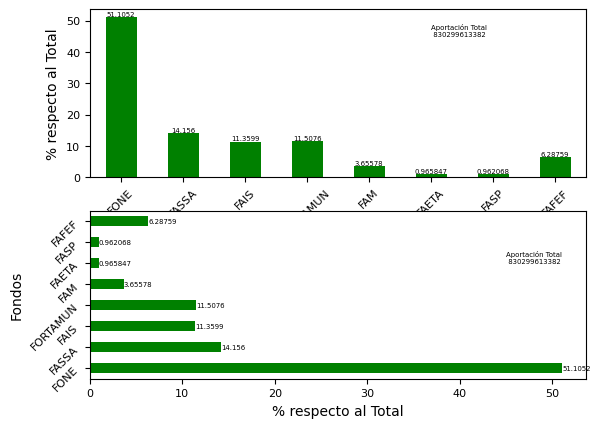

In [2]:
import matplotlib.pyplot as plt
print(fondos_mt['%'].sum())
fig1, ax = plt.subplots(2)
fondos_mt['%'].plot(kind='bar',rot=45, color = 'g',
                         xlabel='Fondos', ylabel='%' + ' respecto al Total',fontsize=8, ax = ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, fontsize = 5)

fondos_mt['%'].plot(kind='barh',rot=45, color = 'g',
                         ylabel='Fondos', xlabel='%' + ' respecto al Total',fontsize=8, ax = ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, fontsize = 5)

ax[0].text(x = 5, y = 45, s = f'Aportación Total \n {fondos.iloc[-1,0]}',fontsize = 5)
ax[1].text(x = 45, y = 5, s = f'Aportación Total \n {fondos.iloc[-1,0]}',fontsize = 5)
plt.show()

100.0


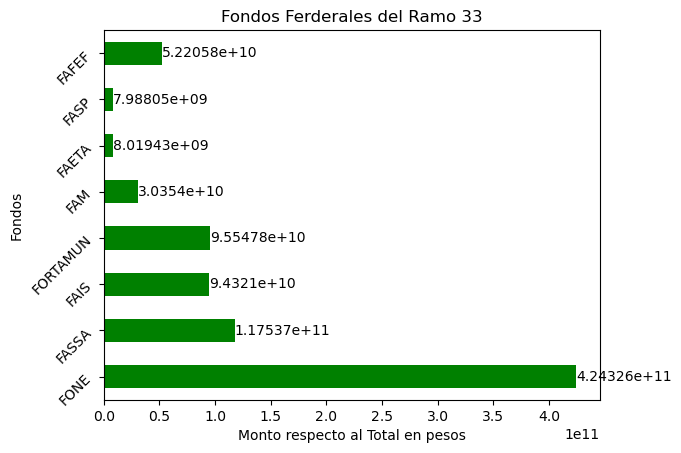

In [3]:
import matplotlib.pyplot as plt
print(fondos_mt['%'].sum())
fig1, ax = plt.subplots()
ax = fondos_mt['Monto'].plot(kind='barh',rot=45,
                         title='Fondos Ferderales del Ramo 33', color = 'g',
                         ylabel='Fondos', xlabel='Monto' + ' respecto al Total en pesos')
for container in ax.containers:
    ax.bar_label(container)

# ax.text(x = 1, y = 1, s = f'Aportación Total \n {fondos.iloc[-1,0]}')
plt.show()


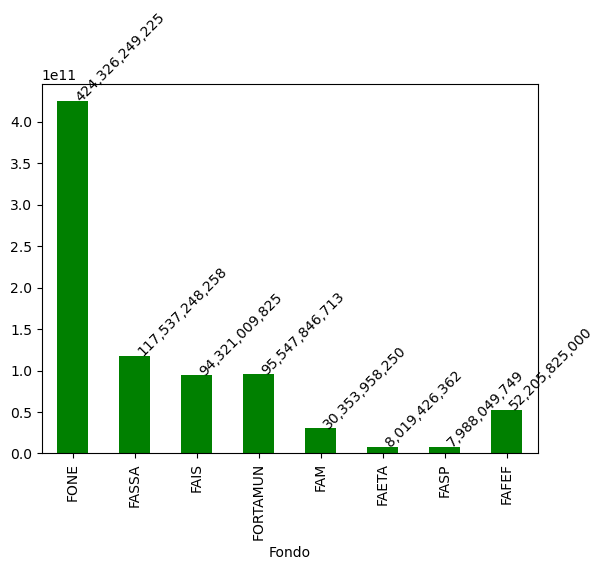

In [4]:
import numpy as np

df=fondos_mt
ax = df['Monto'].plot(kind='bar', color='g') 
x_offset = 0
y_offset = -11
for p in ax.patches:
    b = p.get_bbox()
    val = "{:,.0f}".format(b.y1 + b.y0)      
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), rotation = 45)

Bbox(x0=0.0, y0=-0.25, x1=424326249225.0, y1=0.25)
Bbox(x0=0.0, y0=0.75, x1=117537248258.0, y1=1.25)
Bbox(x0=0.0, y0=1.75, x1=94321009825.0, y1=2.25)
Bbox(x0=0.0, y0=2.75, x1=95547846713.0, y1=3.25)
Bbox(x0=0.0, y0=3.75, x1=30353958250.0, y1=4.25)
Bbox(x0=0.0, y0=4.75, x1=8019426362.0, y1=5.25)
Bbox(x0=0.0, y0=5.75, x1=7988049749.0, y1=6.25)
Bbox(x0=0.0, y0=6.75, x1=52205825000.0, y1=7.25)


Text(620000000000.0, 5, 'Aportación Total\n 830299613382')

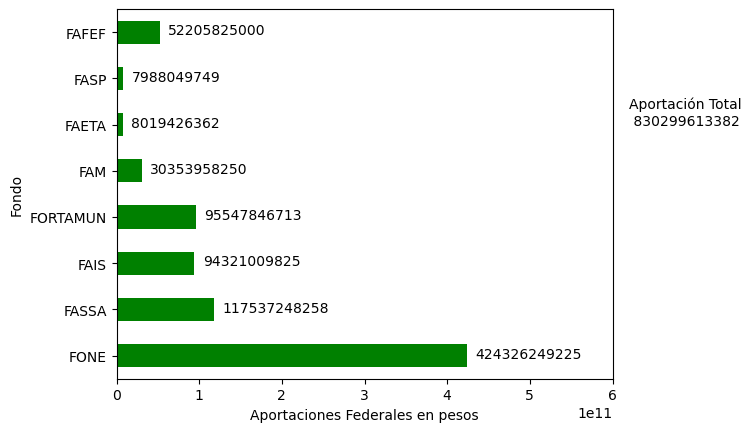

In [5]:
df=fondos_mt
ax = df['Monto'].plot(kind='barh', color='g',xlim=[0,6e11],xlabel='Aportaciones Federales en pesos') 
y_offset = -0.3
x_offset = 0.1e11
for p in ax.patches:
    b = p.get_bbox()
    print(b)
    val = "{:.0f}".format(b.x1 + b.x0)      
    ax.annotate(val, (b.x1 + x_offset, b.y1 + y_offset), rotation = 0)
ax.text(x = 6.2e11, y = 5, s = f'Aportación Total\n {fondos.iloc[-1,0]}',fontsize = 10)

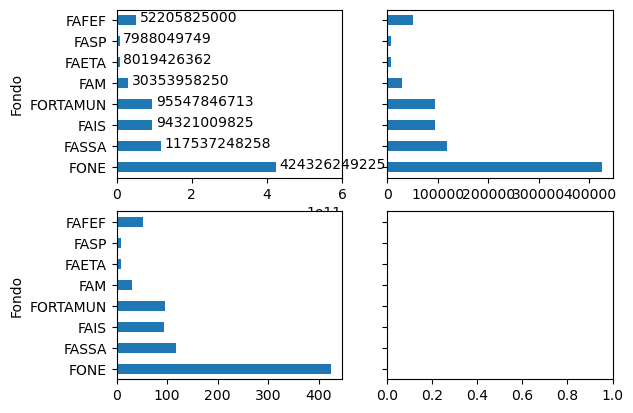

In [6]:
fig_monto, ax = plt.subplots(2,2, sharey = True)
fondos_mt['Monto'].plot(kind='barh',xlim=[0,6e11], ax = ax[0,0]) 
y_offset = -0.3
x_offset = 0.1e11
for p in ax[0,0].patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.x1 + b.x0)      
    ax[0,0].annotate(val, (b.x1 + x_offset, b.y1 + y_offset), rotation = 0)
# ax[0,0].text(x = 6.2e11, y = 5, s = f'Aportación Total\n {fondos.iloc[-1,0]}',fontsize = 10)

fondos_mt['Monto_MM'].plot(kind='barh', ax = ax[0,1]) 
y_offset = -0.3
x_offset = 0.1e11
for p in ax[0,1].patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.x1 + b.x0)      
    ax[0,1].annotate(val, (b.x1 + x_offset, b.y1 + y_offset), rotation = 0)
# ax[0,0].text(x = 6.2e11, y = 5, s = f'Aportación Total\n {fondos.iloc[-1,0]}',fontsize = 10)

fondos_mt['Monto_MMM'].plot(kind='barh', ax = ax[1,0]) 
y_offset = -0.3
x_offset = 0.1e11
for p in ax[1,0].patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.x1 + b.x0)      
    ax[1,0].annotate(val, (b.x1 + x_offset, b.y1 + y_offset))


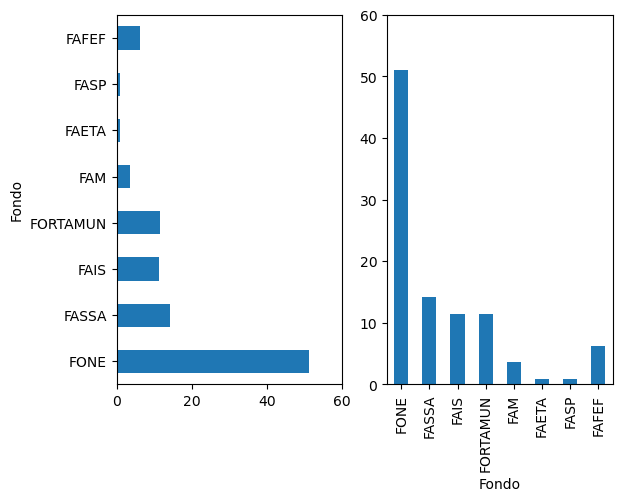

In [7]:
def bar_text(ax):
    y_offset = -0.3
    x_offset = 0.1e11
    for p in ax.patches:
        b = p.get_bbox()
        val = "{:.0f}".format(b.x1 + b.x0)      
        ax.annotate(val, (b.x1 + x_offset, b.y1 + y_offset), rotation = 0)

fig_perc, ax = plt.subplots(ncols=2, nrows = 1)

fondos_mt['%'].plot(kind='barh', xlim = [0,60], ax = ax[0])
bar_text(ax = ax[0])

fondos_mt['%'].plot(kind='bar', ylim = [0,60], ax = ax[1]) 
bar_text(ax = ax[1])


In [8]:
fisdmf2022 = data[sheets[1]].copy()
fisdmf2022 = fisdmf2022.iloc[3:,1:]
fisdmf2022
fisdmf2022.columns = fisdmf2022.iloc[0,:]
fisdmf2022 = fisdmf2022.iloc[1:]
fisdmf2022.set_index('E N T I D A D E S',drop=True,inplace=True)

abr = pd.read_excel('plot_data\\Abreviaturas.xlsx')
abtra = [t.replace('MX-','') for t in abr['Abreviatura'].to_list()]
new_c = ['TOTAL'] + abtra + ['ASF']

fisdmf2022['Estados*'] = new_c
fisdmf2022.set_index('Estados*',inplace=True)
fisdmf2022['ANUAL %'] = 100 * fisdmf2022['ANUAL'] / fisdmf2022.iloc[0, 0] 


fis_data = fisdmf2022[['ANUAL','ANUAL %']]
fis_data = fis_data.iloc[1:-1]
fis_data['ANUAL MDP'] = fis_data['ANUAL'] / 1e6
fis_data['ANUAL MMDP'] = fis_data['ANUAL'] / 1e9
fis_data.sort_values('ANUAL %',ascending=True,inplace=True)
fis_data

3,ANUAL,ANUAL %,ANUAL MDP,ANUAL MMDP
Estados*,,,,
BCS,241962342,0.291915,241.962342,0.241962
AGU,380213034,0.458707,380.213034,0.380213
COL,421991920,0.509111,421.99192,0.421992
BCN,622524780,0.751044,622.52478,0.622525
COA,731118970,0.882057,731.11897,0.731119
QUE,787407113,0.949966,787.407113,0.787407
SON,835949176,1.008529,835.949176,0.835949
TLA,842194640,1.016064,842.19464,0.842195
NLE,934463212,1.127381,934.463212,0.934463


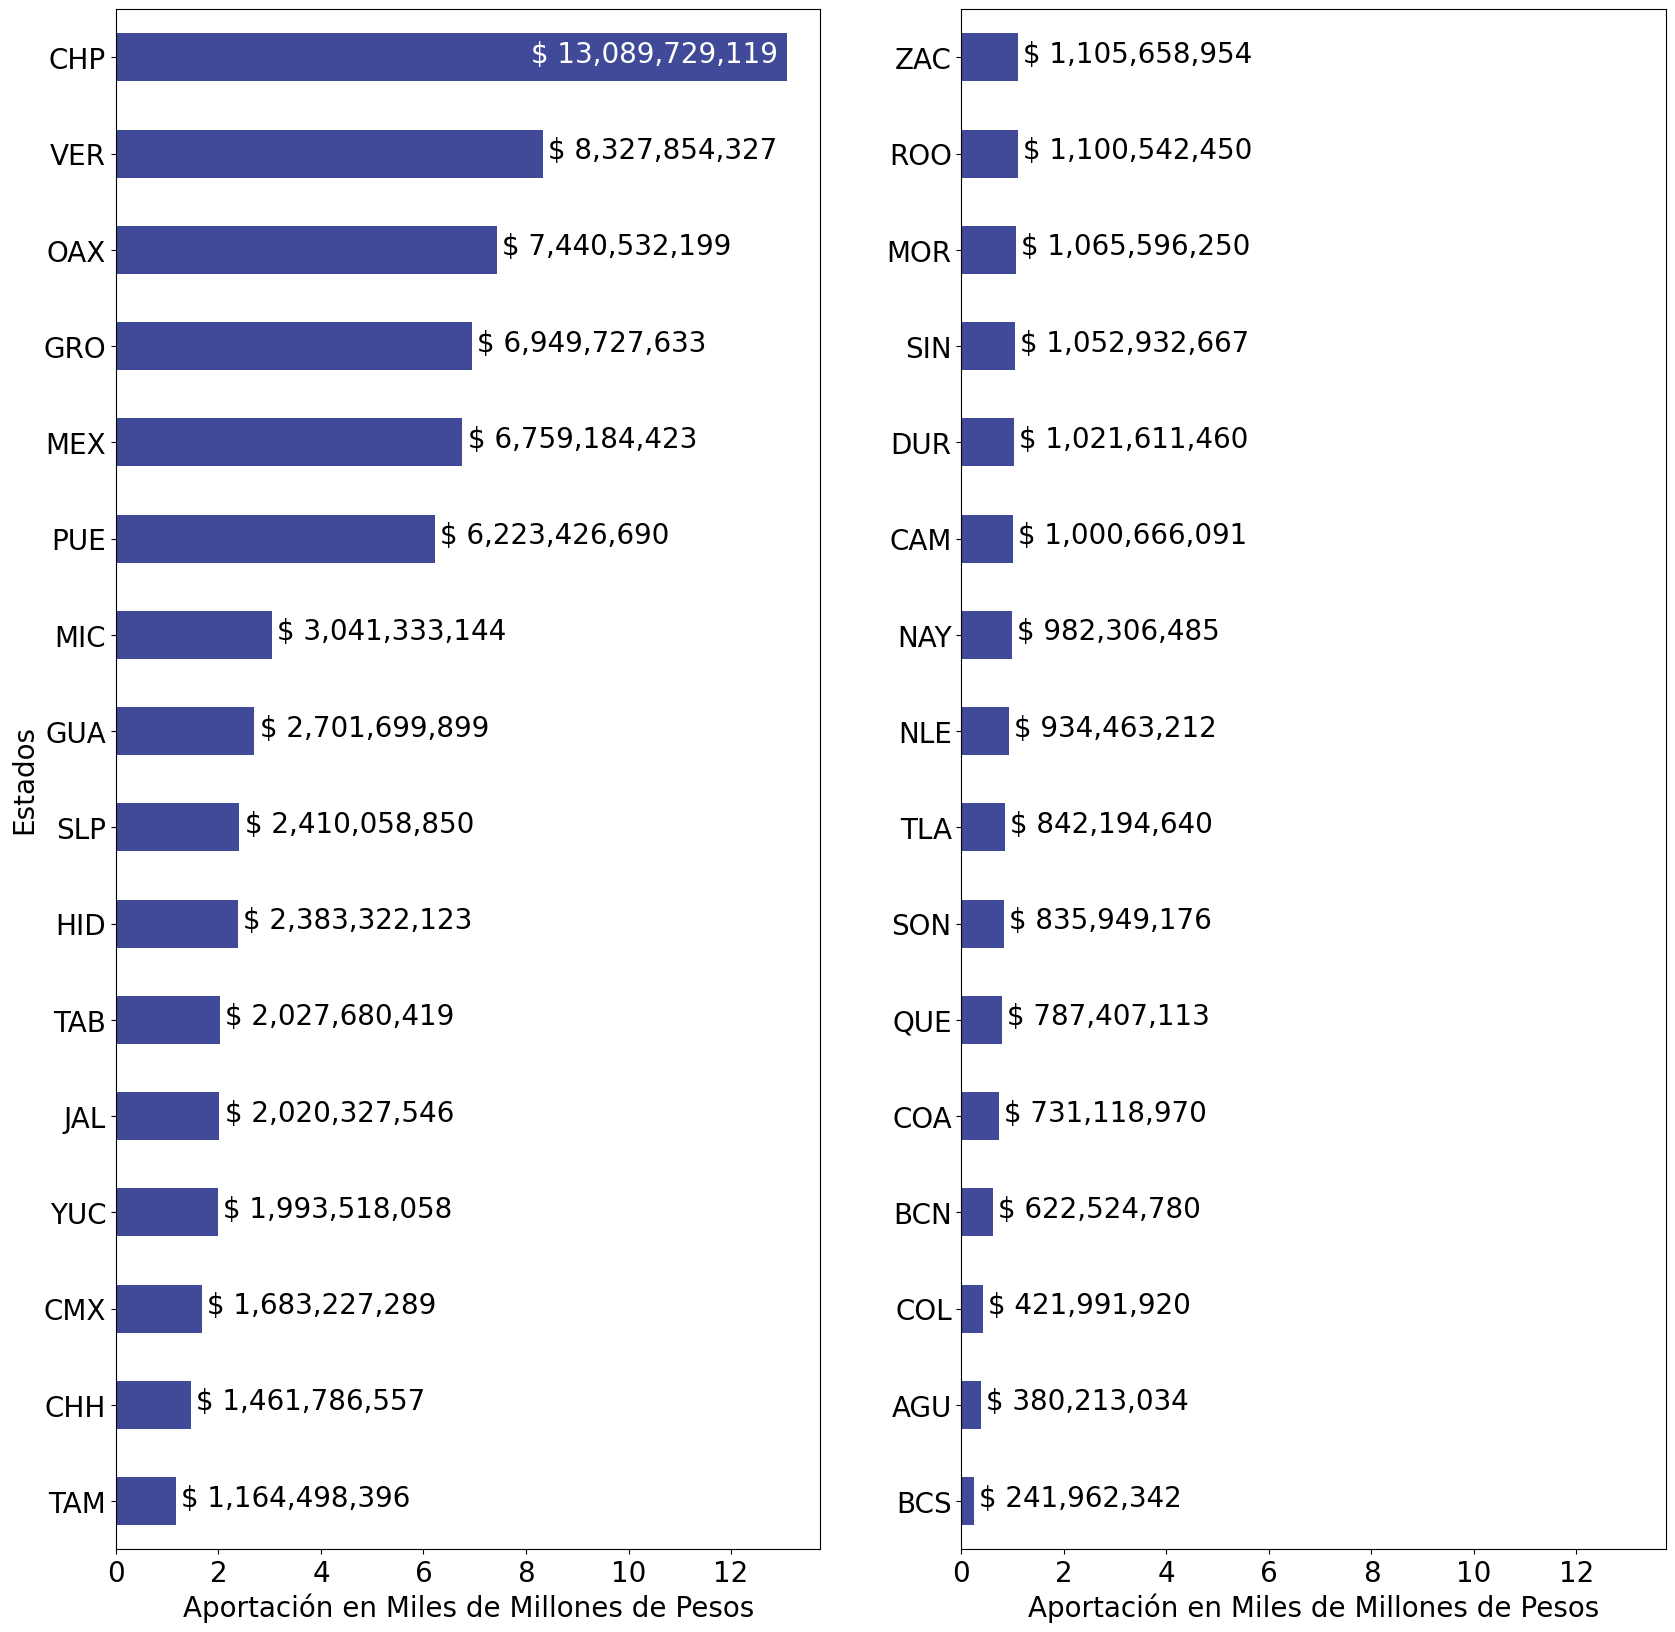

In [9]:
dfr = fis_data.iloc[:16,]
dfl = fis_data.iloc[16:,]


fis2, ax = plt.subplots(ncols=2, nrows=1, figsize = (20,20),sharex=True)
dfl['ANUAL MMDP'].plot(kind='barh',
                      color = color_vp,
                      ax = ax[0],
                      fontsize=20)
ax[0].set_ylabel('Estados', fontsize = 20)
ax[0].set_xlabel('Aportación en Miles de Millones de Pesos', fontsize=20)
dfr['ANUAL MMDP'].plot(kind='barh',
                      color = color_vp,
                      ax = ax[1],
                      ylabel='',
                      fontsize=20)
ax[1].set_xlabel('Aportación en Miles de Millones de Pesos', fontsize=20)
x_offset = 0.1
y_offset = -0.3

for n, p in enumerate(ax[0].patches):
    b = p.get_bbox()
    if n < len(dfl) - 1:
        num = f"$ {int(dfl.iloc[n, 0]):,}"     
        ax[0].annotate(num, (b.x1 + x_offset, b.y1 + y_offset), fontsize = 20)
    else:
        num = f"$ {int(dfl.iloc[n, 0]):,}"     
        ax[0].annotate(num, (b.x1 - 50 * x_offset, b.y1 + y_offset), fontsize = 20, color = 'white')

# fis2.suptitle('Porcentaje de Aportaciones Federales y Montos', fontsize = 20)
for n, p in enumerate(ax[1].patches):
    b = p.get_bbox()
    num = f"$ {int(dfr.iloc[n, 0]):,}"   
    ax[1].annotate(num, (b.x1 + x_offset, b.y1 + y_offset), fontsize = 20)
    

(9000, 0.5)

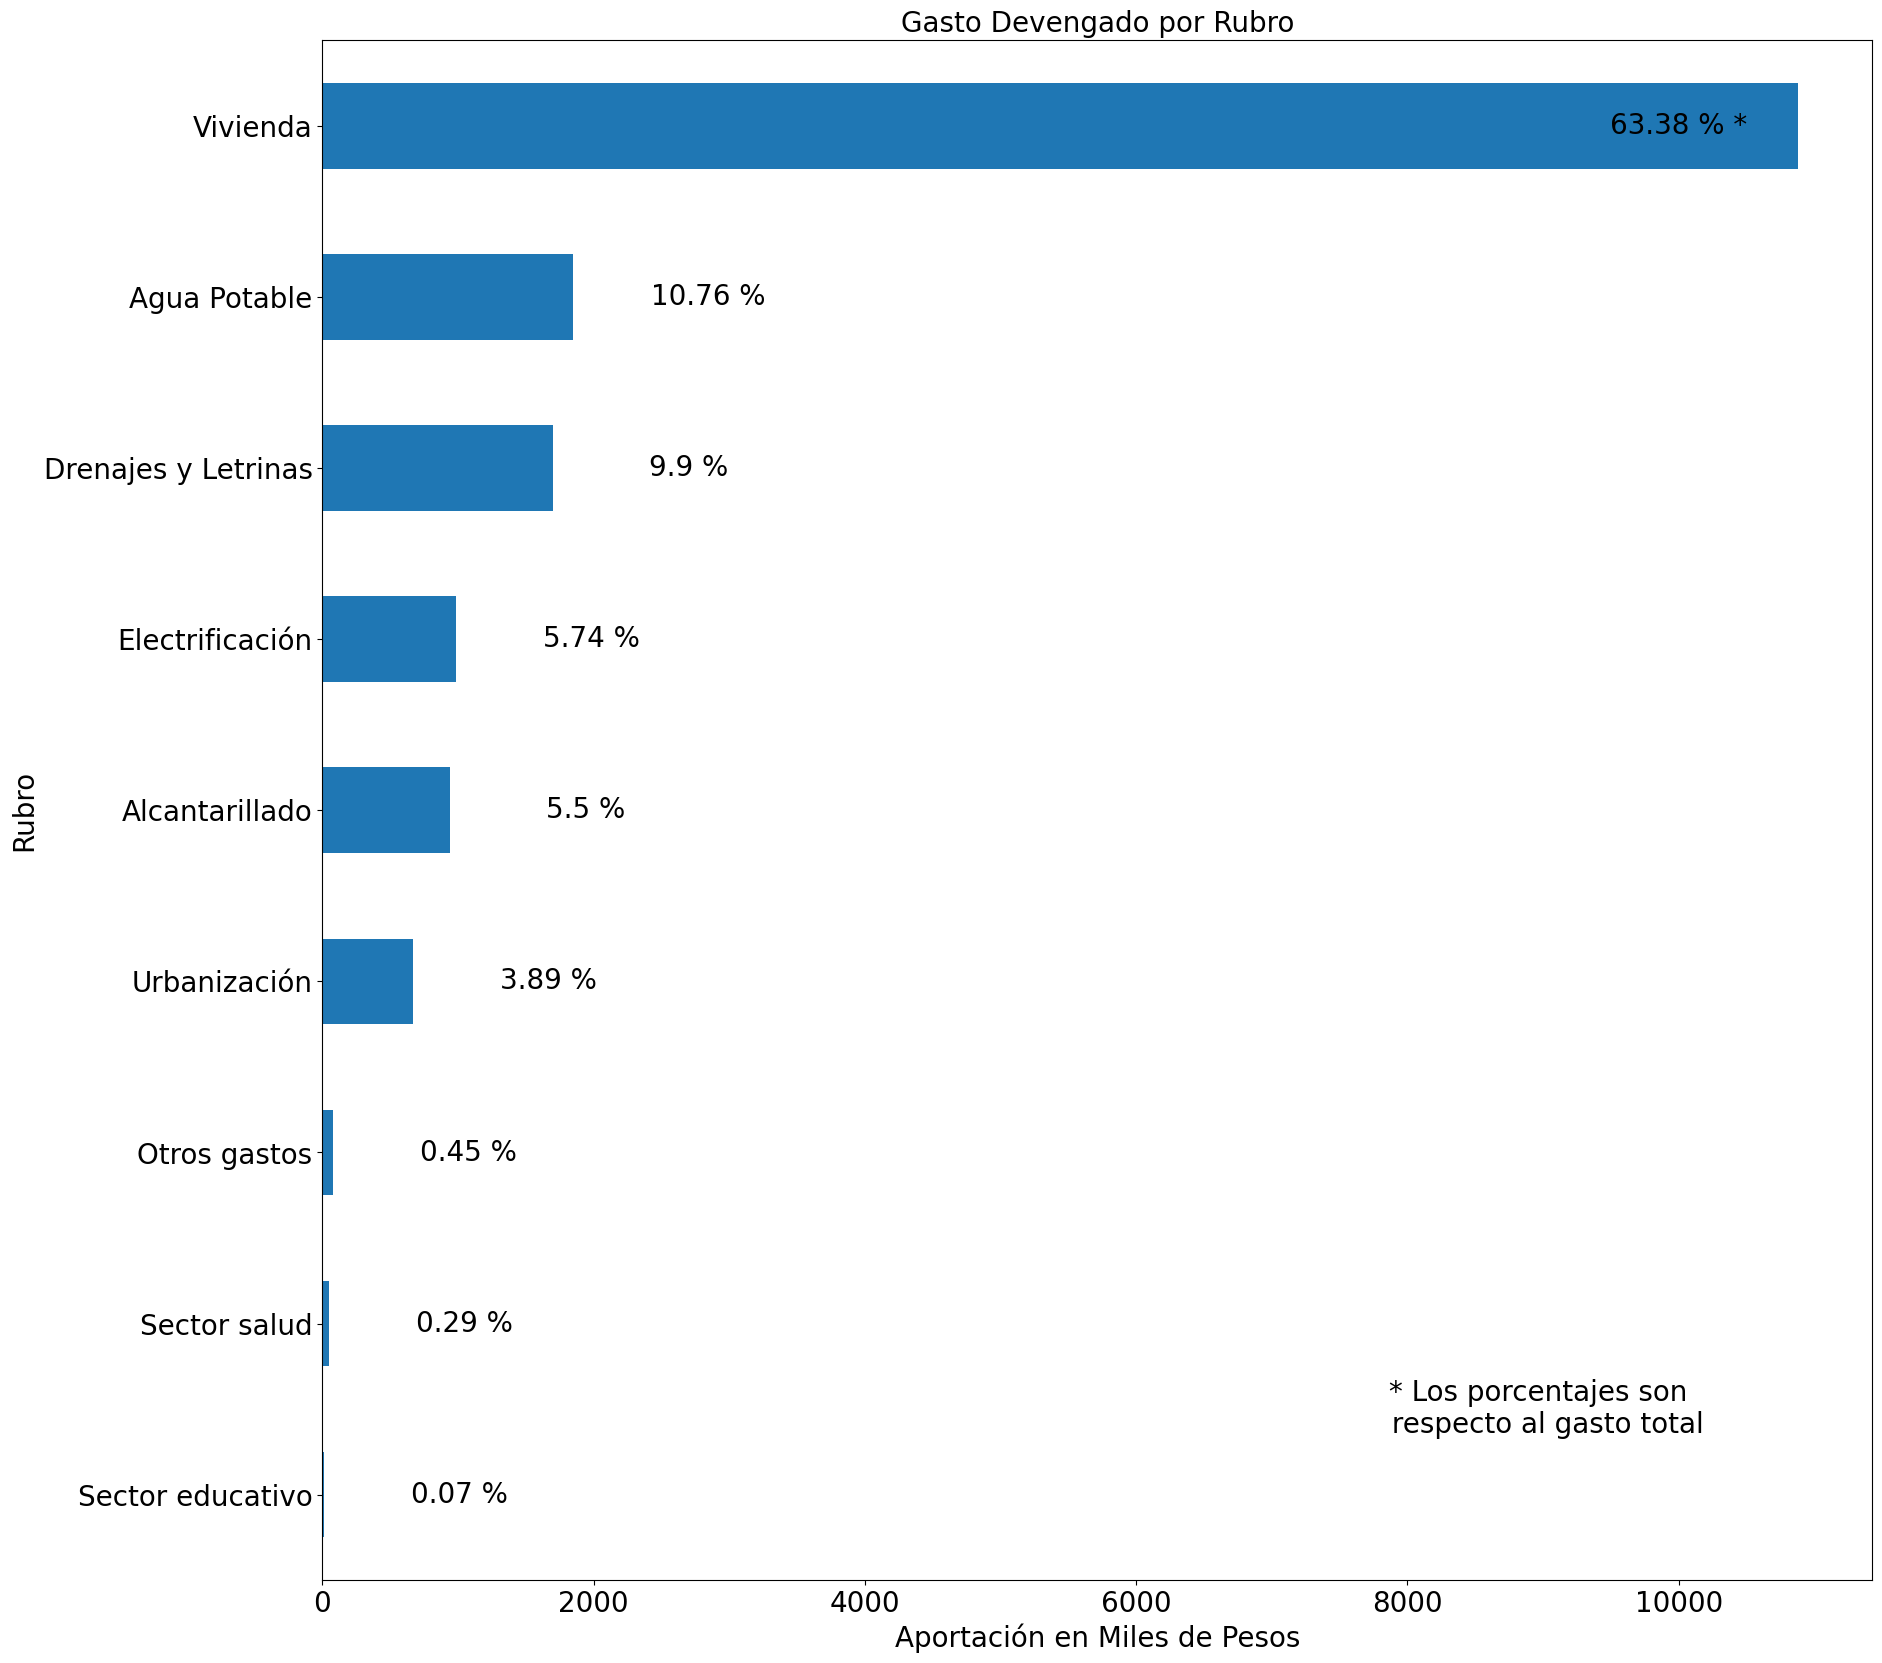

In [10]:
def text_block(content, pos, ax):
    ax.annotate(text = content,
                    xy=pos, 
                    fontsize=20,
                    horizontalalignment='center', 
                    verticalalignment='center')
    return pos 

rubro = data['Concentrado']

rubro = rubro.iloc[15:]
rubro = rubro.dropna(how = 'all', axis=1)
rubro.columns = rubro.iloc[0,:]
rubro = rubro.iloc[1:]
rubro['%'] = [round(y * 100, 2) for y in rubro['%'].tolist()]
rubro.reset_index(inplace=True,drop=True)
rubro.set_index('Rubro',drop=True, inplace=True)

rubro_plot = rubro.iloc[:-1, :]
rubro_plot = rubro_plot.sort_values('Devengado')
rubdev, ax = plt.subplots(figsize = (20,20))
rubro_plot['Devengado'] = rubro_plot['Devengado'] / 1000


rubro_plot['Devengado'].plot(kind='barh', ax = ax, fontsize=20)
ax.set_title("Gasto Devengado por Rubro", fontsize = 20)
ax.set_xlabel('Aportación en Miles de Pesos', fontsize=20)
ax.set_ylabel('Rubro', fontsize=20)
for j, i in enumerate(rubro_plot.index):
    if rubro_plot.loc[i, '%'] > 15:
        text_block(f"{rubro_plot.loc[i, '%']:,} % *",(1e4, j),ax)
    else:
        text_block(f"{rubro_plot.loc[i, '%']:,} %",(rubro_plot.loc[i, 'Devengado'] + 1000, j),ax)
        
text_block("* Los porcentajes son \n respecto al gasto total",(9000, 0.5) ,ax)


<Axes: ylabel='%'>

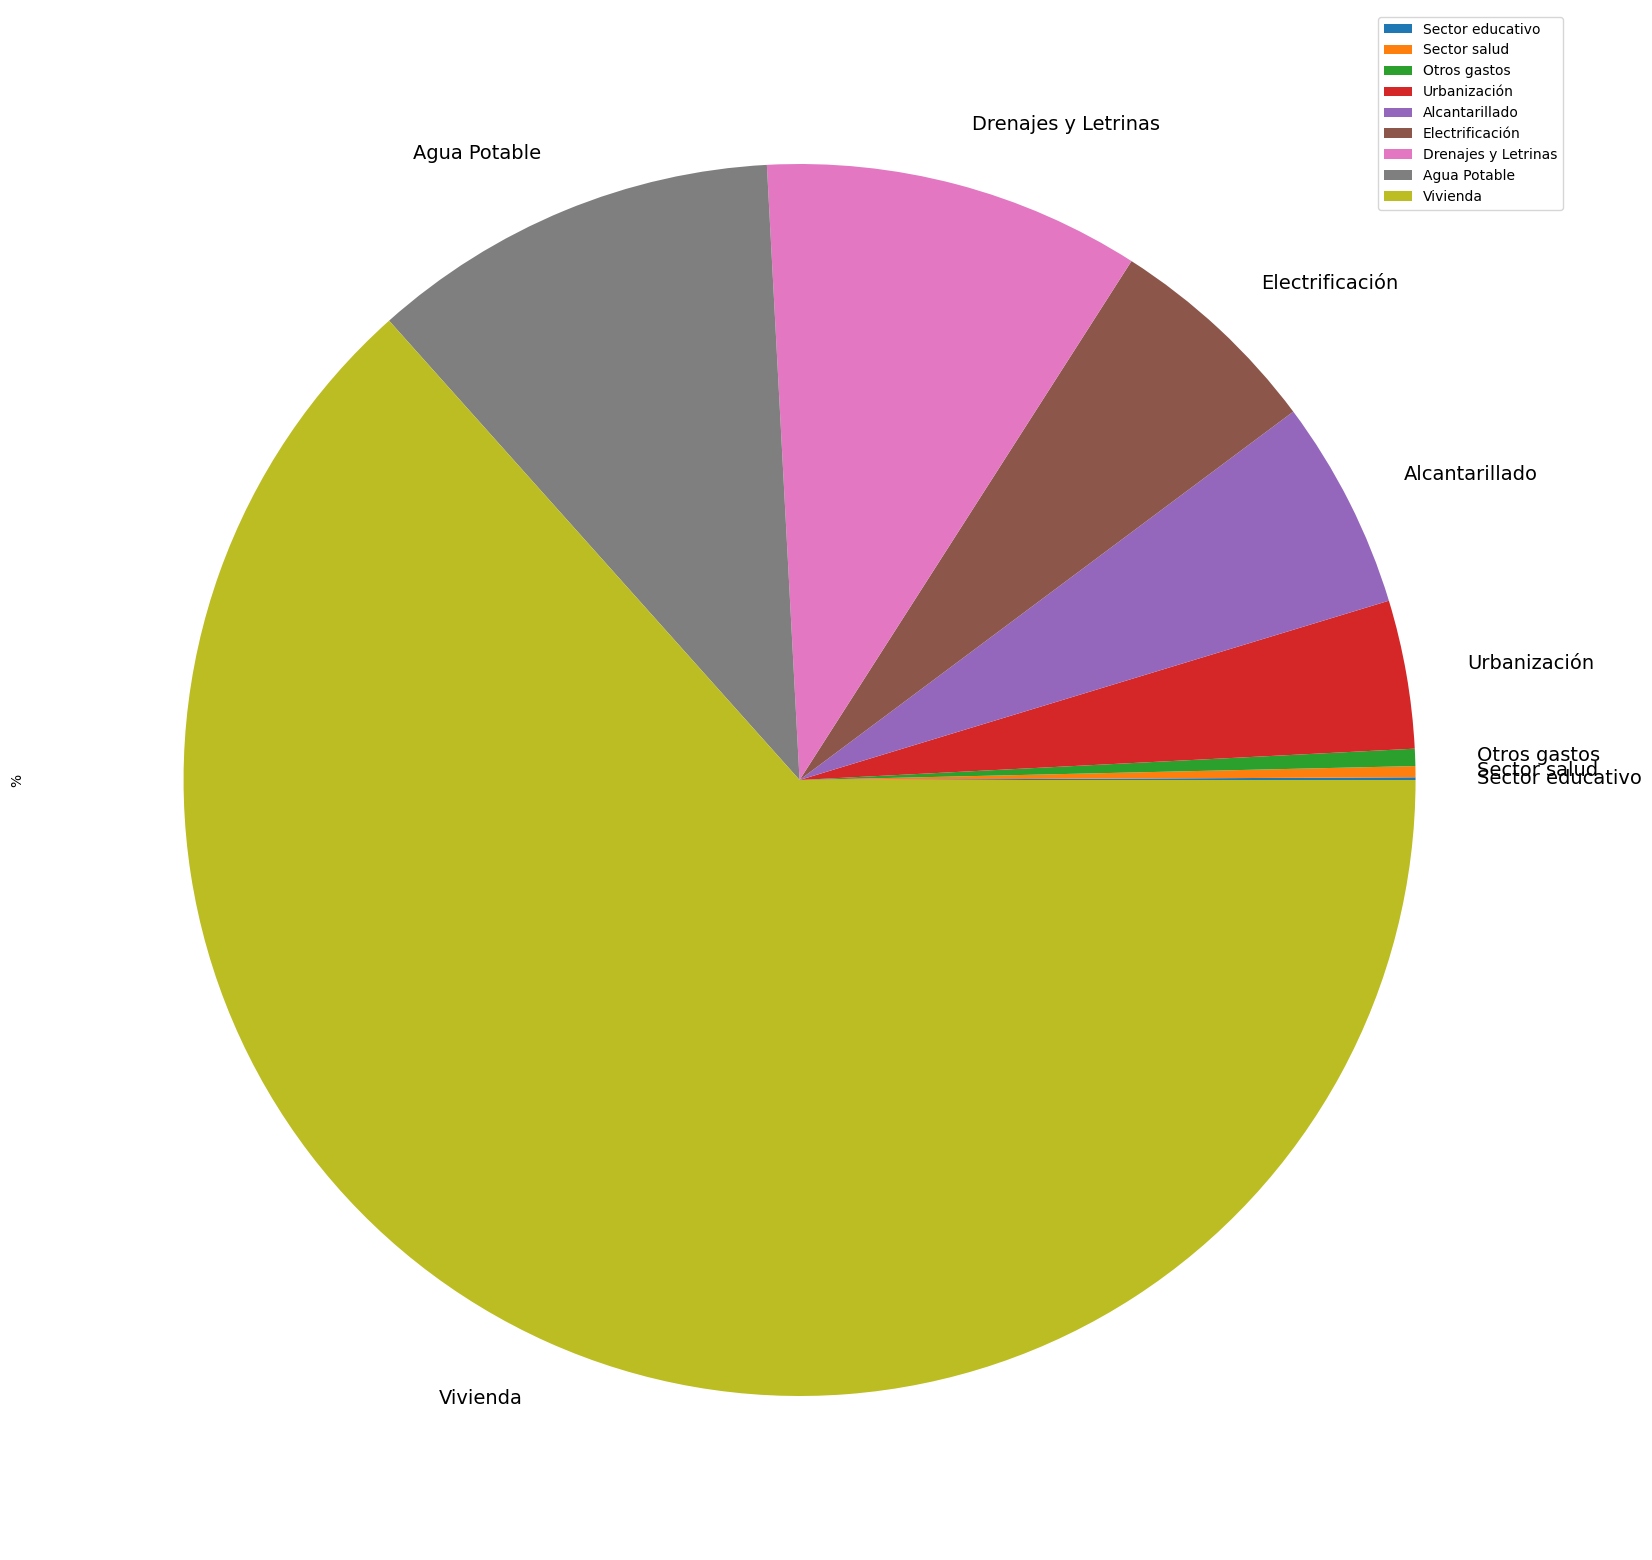

In [11]:
rubro_plot['%'].plot(kind='pie',legend=True , figsize=(20,20), fontsize = 14)

# Grafica de Pastel (Remplazada)

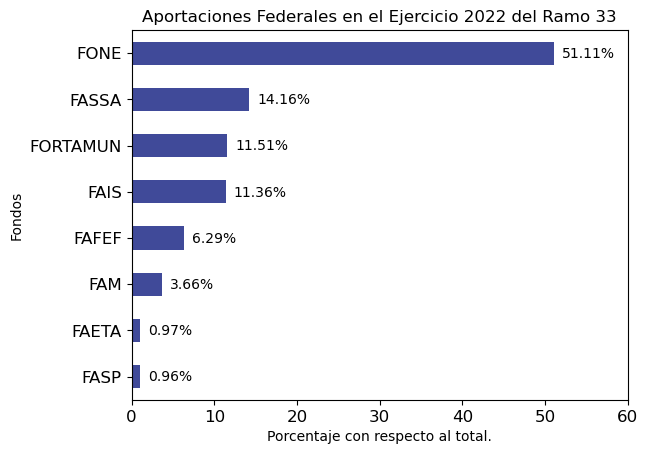

In [12]:
ramo33, ax = plt.subplots()
fondos_mt.sort_values('Monto',inplace=True)
fondos_mt['%'].plot(kind='barh', color = color_vp, xlim = [0,60],
                         ylabel='Fondos', xlabel='Porcentaje con respecto al total.',fontsize=12, ax = ax)
x_offset = 1
y_offset = -0.35
plt.title('Aportaciones Federales en el Ejercicio 2022 del Ramo 33')
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.x1 + b.x0) + '%'      
    ax.annotate(val, (b.x1 + x_offset, b.y1 + y_offset))

## Estados

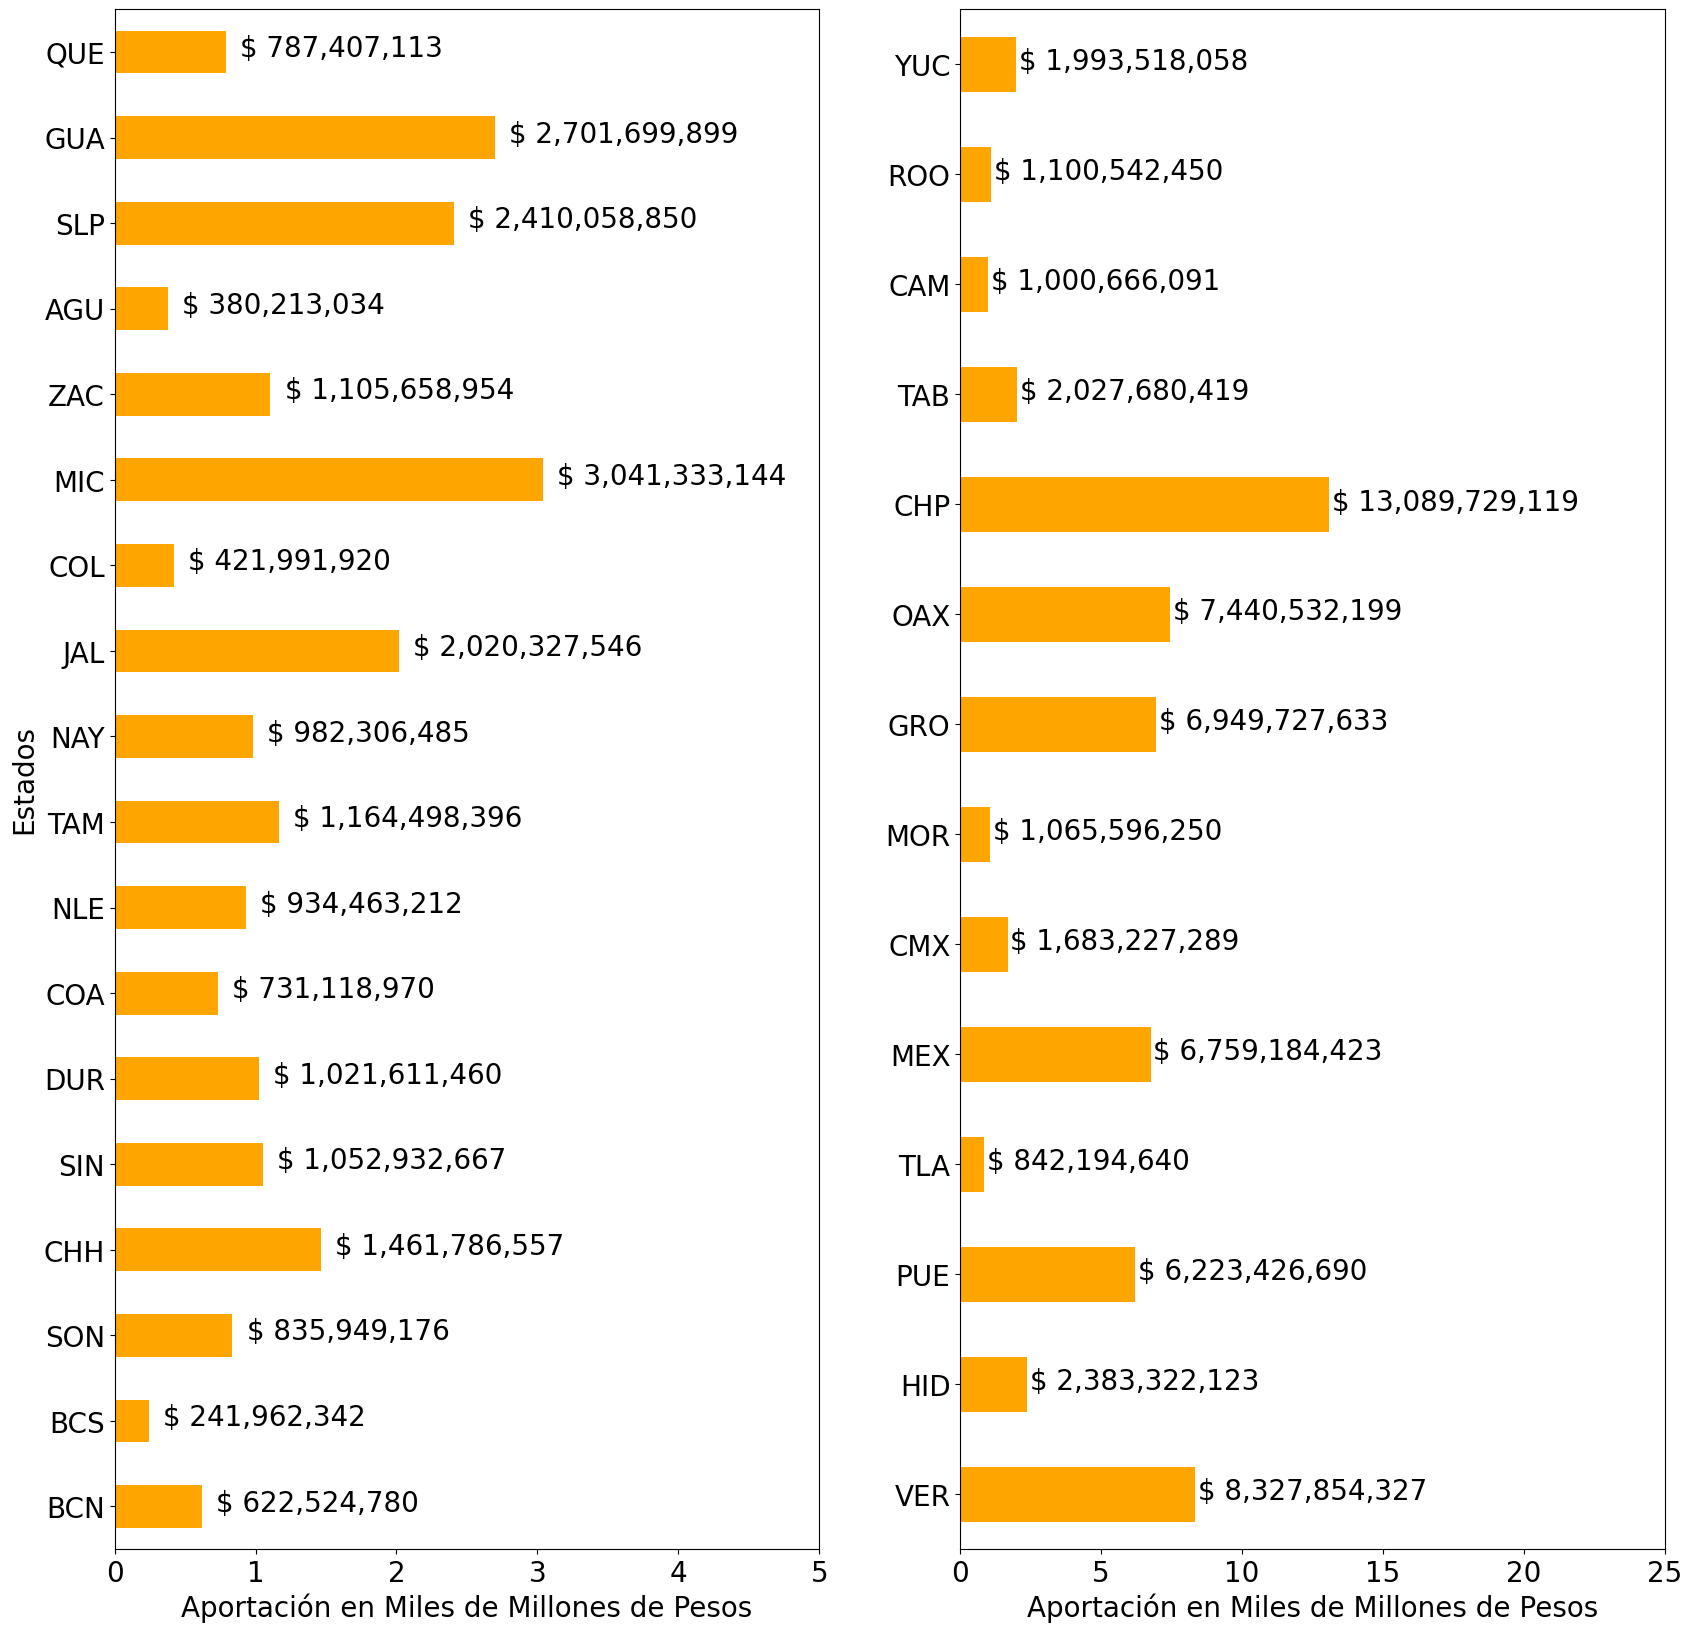

In [13]:

color_test = 'orange'
cmap_test = 'viridis'

region_norte = ['BCN','BCS','SON','CHH','SIN','DUR','COA','NLE','TAM']
region_sur = ['GRO','OAX','CHP','TAB','CAM','ROO','YUC']
region_oriente = ['VER','HID', 'PUE','TLA','MEX','CMX','MOR']
region_occidente = ['NAY','JAL','COL','MIC','ZAC','AGU','SLP','GUA','QUE']


dfl = fis_data.loc[region_norte + region_occidente]
dfr = fis_data.loc[region_oriente + region_sur]

fis2, ax = plt.subplots(ncols=2, nrows=1, figsize = (20,20))
dfl['ANUAL MMDP'].plot(kind='barh',
                      color = color_test,
                      ax = ax[0],
                      fontsize=20,
                      xlim = [0,5])
ax[0].set_ylabel('Estados', fontsize = 20)
ax[0].set_xlabel('Aportación en Miles de Millones de Pesos', fontsize=20)
dfr['ANUAL MMDP'].plot(kind='barh',
                      color = color_test,
                      ax = ax[1],
                      ylabel='',
                      fontsize=20,
                      xlim = [0,25])
ax[1].set_xlabel('Aportación en Miles de Millones de Pesos', fontsize=20)
x_offset = 0.1
y_offset = -0.3

for n, p in enumerate(ax[0].patches):
    b = p.get_bbox()
    num = f"$ {int(dfl.iloc[n, 0]):,}"     
    ax[0].annotate(num, (b.x1 + x_offset, b.y1 + y_offset), fontsize = 20)

# fis2.suptitle('Porcentaje de Aportaciones Federales y Montos', fontsize = 20)
for n, p in enumerate(ax[1].patches):
    b = p.get_bbox()
    num = f"$ {int(dfr.iloc[n, 0]):,}"   
    ax[1].annotate(num, (b.x1 + x_offset, b.y1 + y_offset), fontsize = 20)


# Municipios

In [14]:
fis_mun = data['Hoja5']
fis_mun = fis_mun.iloc[3:-1,1:]
fis_mun.columns = fis_mun.iloc[0,:]
fis_mun = fis_mun.iloc[1:,]
fis_mun.reset_index(drop=True,inplace=True)
mun_t = fis_mun.iloc[-1,1]
fis_mun['ANUAL %'] = fis_mun['ANUAL'] / mun_t * 100
fis_mun_data = fis_mun[['MUNICIPIOS','ANUAL','ANUAL %']].copy()
fis_mun_data['ANUAL MDP'] = fis_mun_data['ANUAL'] / 1e6
cvegeo_mun = [str(26001 + i) for i in range(72)]
fis_mun_data['CVEGEO']  = cvegeo_mun + ['*']
fis_mun_data

3,MUNICIPIOS,ANUAL,ANUAL %,ANUAL MDP,CVEGEO
0,ACONCHI,3787227,0.453045,3.787227,26001
1,AGUA PRIETA,17544854,2.098794,17.544854,26002
2,ALAMOS,32564309,3.895489,32.564309,26003
3,ALTAR,4151214,0.496587,4.151214,26004
4,ARIVECHI,3306710,0.395564,3.30671,26005
...,...,...,...,...,...
68,URES,2440641,0.29196,2.440641,26069
69,VILLA HIDALGO,1406408,0.168241,1.406408,26070
70,VILLA PESQUEIRA,1544238,0.184729,1.544238,26071
71,YECORA,11643798,1.392883,11.643798,26072


In [15]:
muni = pd.read_excel('plot_data\\absolute.xlsx')
munici = list(muni['Unnamed: 0'])
fis_mun_data['MUNICIPIOS'] = list(munici) + ['*']
fis_mun_data.sort_values('ANUAL',inplace=True)
fis_mun_data['CV2'] = [s[3:] for s in fis_mun_data['CVEGEO']]
fis_mun_data

3,MUNICIPIOS,ANUAL,ANUAL %,ANUAL MDP,CVEGEO,CV2
54,San Luis Río Colorado,219818,0.026296,0.219818,26055,55
47,Puerto Peñasco,250599,0.029978,0.250599,26048,48
35,Magdalena,259611,0.031056,0.259611,26036,36
6,Atil,280533,0.033559,0.280533,26007,07
56,San Pedro de la Cueva,408836,0.048907,0.408836,26057,57
...,...,...,...,...,...,...
26,Fronteras,62917072,7.526423,62.917072,26027,27
18,Cananea,64155702,7.674594,64.155702,26019,19
43,Onavas,77224305,9.237919,77.224305,26044,44
31,Huásabas,131850628,15.772565,131.850628,26032,32


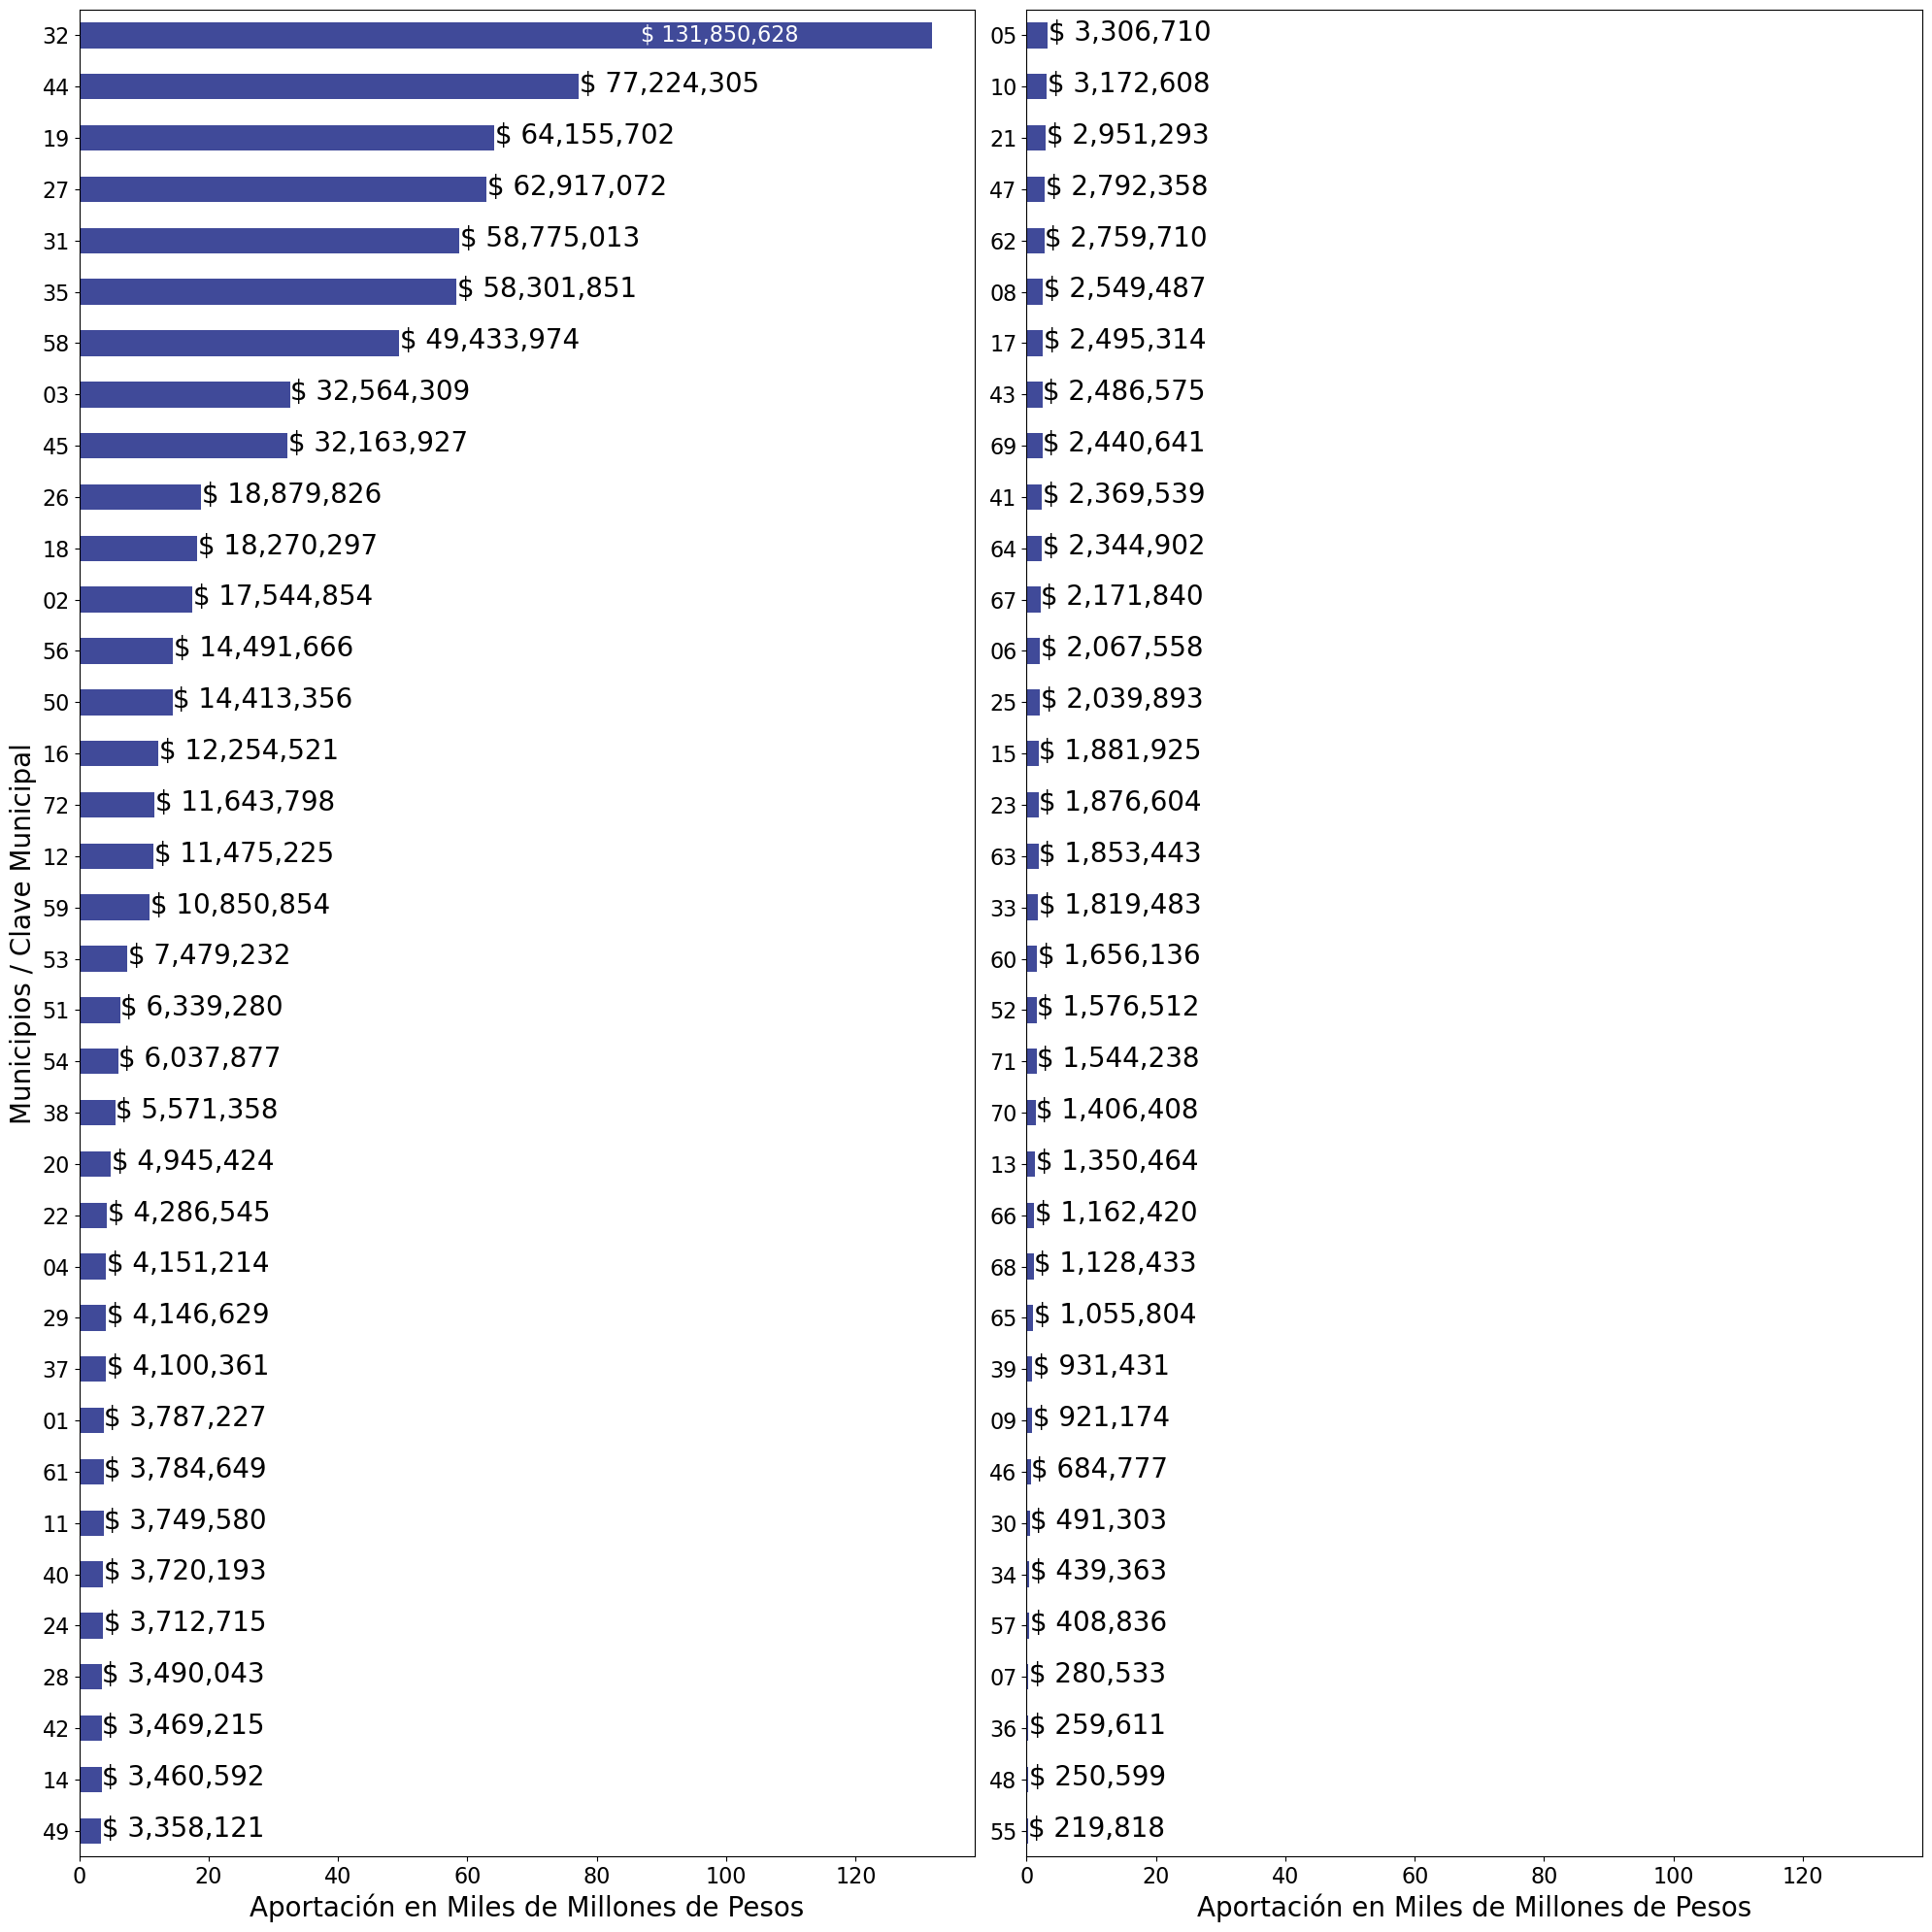

In [16]:

dfl = fis_mun_data.iloc[:36,]
dfr = fis_mun_data.iloc[36:-1,]


dfl.set_index('CV2',inplace=True)
dfr.set_index('CV2',inplace=True)
fis2, ax = plt.subplots(ncols=2, nrows=1, figsize = (20,20),sharex=True)
dfr['ANUAL MDP'].plot(kind='barh',
                      color = color_vp,
                      ax = ax[0],
                      fontsize=16)
ax[0].set_ylabel('Municipios / Clave Municipal', fontsize = 20)
ax[0].set_xlabel('Aportación en Miles de Millones de Pesos', fontsize=20)
# ax[0].set_yticklabels(labels = dfr.index, horizontalalignment = 'right')
dfl['ANUAL MDP'].plot(kind='barh',
                      color = color_vp,
                      ax = ax[1],
                      ylabel='',
                      fontsize=16)
ax[1].set_xlabel('Aportación en Miles de Millones de Pesos', fontsize=20)
# ax[1].set_yticklabels(labels = dfl.index, horizontalalignment = 'rigth')
x_offset = 0.1
y_offset = -0.36

for n, p in enumerate(ax[1].patches):
    b = p.get_bbox()
    num = f"$ {int(dfl.iloc[n, 1]):,}"     
    ax[1].annotate(num, (b.x1 + x_offset, b.y1 + y_offset), fontsize = 20)

# fis2.suptitle('Porcentaje de Aportaciones Federales y Montos', fontsize = 20)
for n, p in enumerate(ax[0].patches):
    b = p.get_bbox()
 
    if n == len(dfr) - 1:
        num = f"$ {int(dfr.iloc[n, 1]):,}"   
        ax[0].annotate(num, (b.x1 - 450 * x_offset, b.y1 + y_offset), fontsize = 16, color = 'white')
    else:    
        num = f"$ {int(dfr.iloc[n, 1]):,}"   
        ax[0].annotate(num, (b.x1 + x_offset, b.y1 + y_offset), fontsize = 20)
plt.tight_layout()
# plt.suptitle('Aportaciones Municipales del FAISM')


In [17]:
tabla_vp = pd.read_excel('plot_data\\tablavp.xlsx')



tabla_vp.set_index('Estado',drop=True, inplace=True)
tabla_vp['dAbs'] = tabla_vp['dPY'].abs()
tabla_vp['color'] = ['green' if u >= 0 else 'red' for u in tabla_vp['dPY']]
tabla_vp.sort_values('AC', ascending=True, inplace=True)
tabla_s = tabla_vp.copy()





In [18]:
abreviaturas = pd.read_excel('plot_data\\Abreviaturas.xlsx')

abreviaturas['NEW'] = [s[3:] for s in abreviaturas['Abreviatura']]

abreviaturas['Estado'] = abreviaturas['Estado'].str.replace('Estado de ', '')
abreviaturas.iloc[4,0] = 'Coahuila'
abreviaturas.iloc[23,0] = 'San Luís Potosí'
abreviaturas.iloc[21,0] = 'Queretaro'
abreviaturas.iloc[8,0] = 'Cuidad de México'

f = [list(abreviaturas['Estado']).index(u) for u in tabla_s.index]

tabla_s['ABR'] = [list(abreviaturas['NEW'])[q] for q in f]
tabla_s.set_index('ABR',drop=True, inplace=True)

tabla_vp = tabla_s.iloc[:16,]
tabla_vp2 = tabla_s.iloc[16:,]


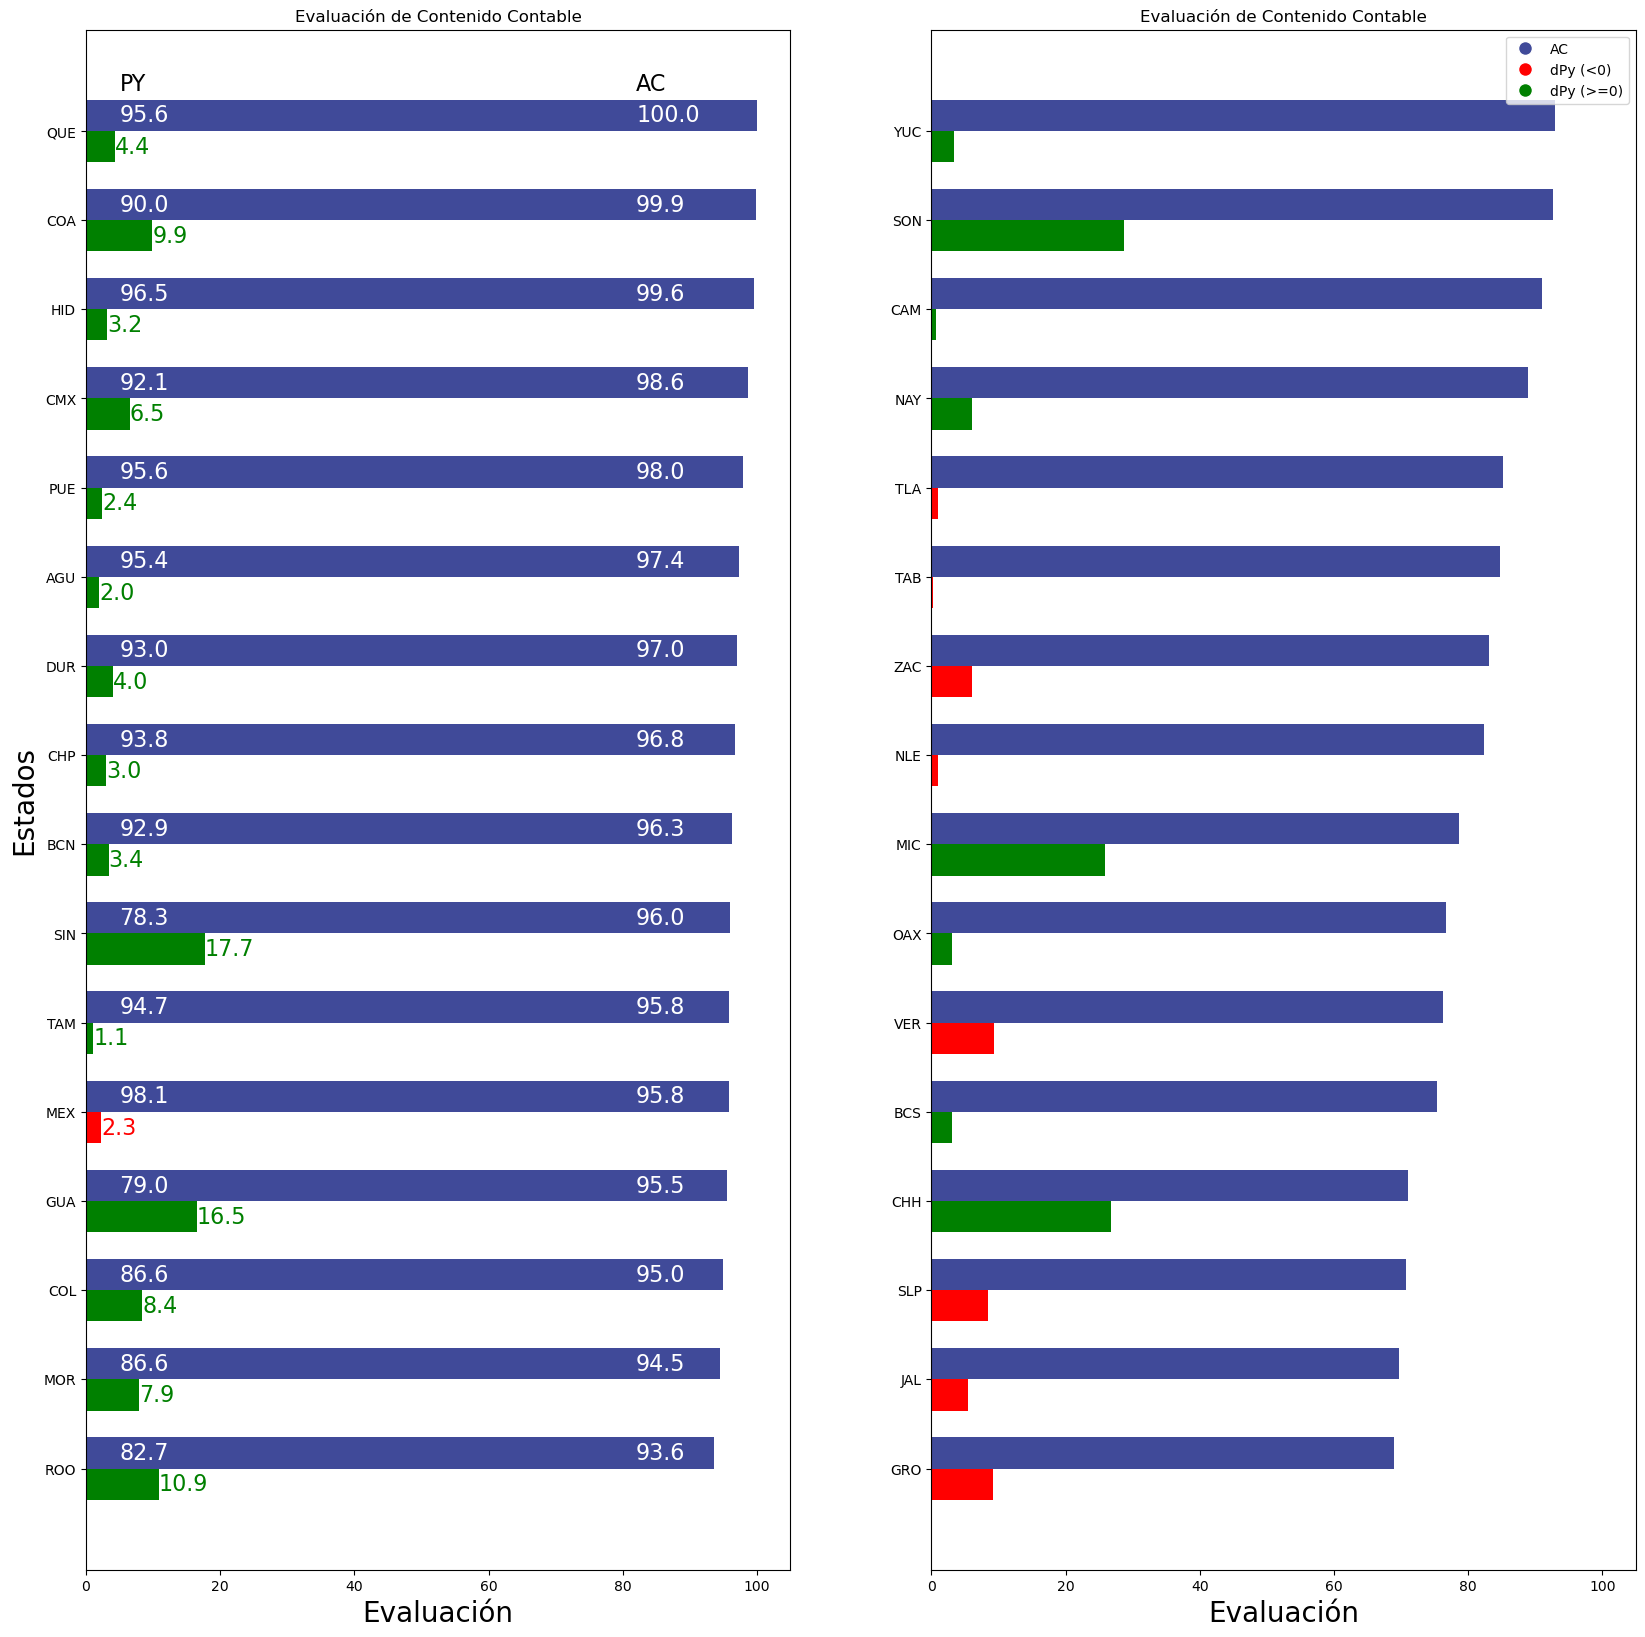

In [19]:
# Criterio para cambiar el color de la segunda serie

# Configurar las posiciones de las barras y el ancho de las barras
ind = np.arange(len(tabla_vp.index))
altura = 0.35  # la altura de las barras

# Crear la gráfica de barras doble horizontal
fig, ax = plt.subplots(ncols = 2, nrows=1, figsize = (20,20), sharex=True)

criterio_color = 0

# Barra 2 (rojo si el valor es mayor que el criterio, azul si es menor o igual)
colores = ['red' if valor < criterio_color else 'green' for valor in tabla_vp['dPY']]
barra2 = ax[1].barh(ind , tabla_vp['dAbs'], altura, label='Serie 2', color=colores)

# Barra 1 (siempre en azul)
barra1 = ax[1].barh(ind + altura, tabla_vp['AC'], altura, label='Serie 1', color=color_vp)


# Barra 1 (siempre en azul)
barra1 = ax[0].barh(ind  + altura, tabla_vp2['AC'], altura, label='Serie 1', color=color_vp)

# Barra 2 (rojo si el valor es mayor que el criterio, azul si es menor o igual)
colores = ['red' if valor < criterio_color else 'green' for valor in tabla_vp2['dPY']]
barra2 = ax[0].barh(ind, tabla_vp2['dAbs'], altura, label='Serie 1', color=colores)



# Etiquetas, título y leyenda
ax[1].set_title('Evaluación de Contenido Contable')
ax[1].set_yticks(ind + altura / 2)
ax[1].set_yticklabels(tabla_vp.index)
ax[1].set_xlabel('Evaluación', fontsize = 20)
ax[0].set_xlabel('Evaluación', fontsize = 20)
ax[0].set_ylabel('Estados', fontsize = 20)
ax[0].set_title('Evaluación de Contenido Contable')
ax[0].set_yticks(ind + altura / 2)
ax[0].set_yticklabels(tabla_vp2.index)

# Leyenda para ambas series
legend_serie1 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_vp, markersize=10, label='AC')
legend_rojo = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='dPy (<0)')
legend_azul = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='dPy (>=0)')
# legend_azul = plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='black', markersize=10, label='PY')
ax[1].legend(handles=[legend_serie1, legend_rojo, legend_azul], loc='upper right')

def text_block(content, pos, ax):
    ax.annotate(text = content,
                    xy=pos, 
                    fontsize=16,
                    horizontalalignment='left', 
                    verticalalignment='center', color = 'white')
    return pos 

for k, estado in enumerate(tabla_vp2.index):
    text_block(f'{tabla_vp2.loc[estado,"AC"]}',(82, ind[k] + altura), ax[0])
    text_block(f'{tabla_vp2.loc[estado,"PY"]}',(5, ind[k] + altura), ax[0])
    ax[0].annotate(text = f'{round(tabla_vp2.loc[estado,"dAbs"], 1)}',
                        xy=(tabla_vp2.loc[estado,'dAbs'], ind[k]), 
                        fontsize=16,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        color = tabla_vp2.iloc[k,-1])
ax[0].annotate(text = 'PY',
                        xy=(5, ind[k] + 2 * altura), 
                        fontsize=16,
                        horizontalalignment='left', 
                        verticalalignment='center')
ax[0].annotate(text = 'AC',
                        xy=(82, ind[k] + 2 * altura), 
                        fontsize=16,
                        horizontalalignment='left', 
                        verticalalignment='center')

# Mostrar la gráfica
plt.show()


In [20]:
tabla_pos1 = pd.DataFrame(index = tabla_vp2.index, columns=['A','clase','color'])
tabla_neg1 = pd.DataFrame(index = tabla_vp2.index, columns=['A','clase','color'])
tabla_pos2 = pd.DataFrame(index = tabla_vp.index, columns = ['A','clase','color'])
tabla_neg2 = pd.DataFrame(index = tabla_vp.index, columns = ['A','clase','color'])

for estado in tabla_vp2.index:
    if tabla_vp2.loc[estado,'dPY'] >= 0:
        tabla_pos1.loc[estado,:] = [tabla_vp2.loc[estado, 'AC'], 'AC','green']
        tabla_neg1.loc[estado,:] = [tabla_vp2.loc[estado, 'PY'], 'dPY','red']
    else:
        tabla_pos1.loc[estado,:] = [tabla_vp2.loc[estado, 'PY'], 'dPY','red']
        tabla_neg1.loc[estado,:] = [tabla_vp2.loc[estado, 'AC'], 'AC','green']
for estado in tabla_vp.index:
    if tabla_vp.loc[estado,'dPY'] >= 0:
        tabla_pos2.loc[estado,:] = [tabla_vp.loc[estado, 'AC'], 'AC','green']
        tabla_neg2.loc[estado,:] = [tabla_vp.loc[estado, 'PY'], 'dPY','red']
    else:
        tabla_pos2.loc[estado,:] = [tabla_vp.loc[estado, 'PY'], 'dPY','red']
        tabla_neg2.loc[estado,:] = [tabla_vp.loc[estado, 'AC'], 'AC','green']
tabla_pos1.head()

,A,clase,color
ABR,,,
ROO,93.6,AC,green
MOR,94.5,AC,green
COL,95.0,AC,green
GUA,95.5,AC,green
MEX,98.1,dPY,red


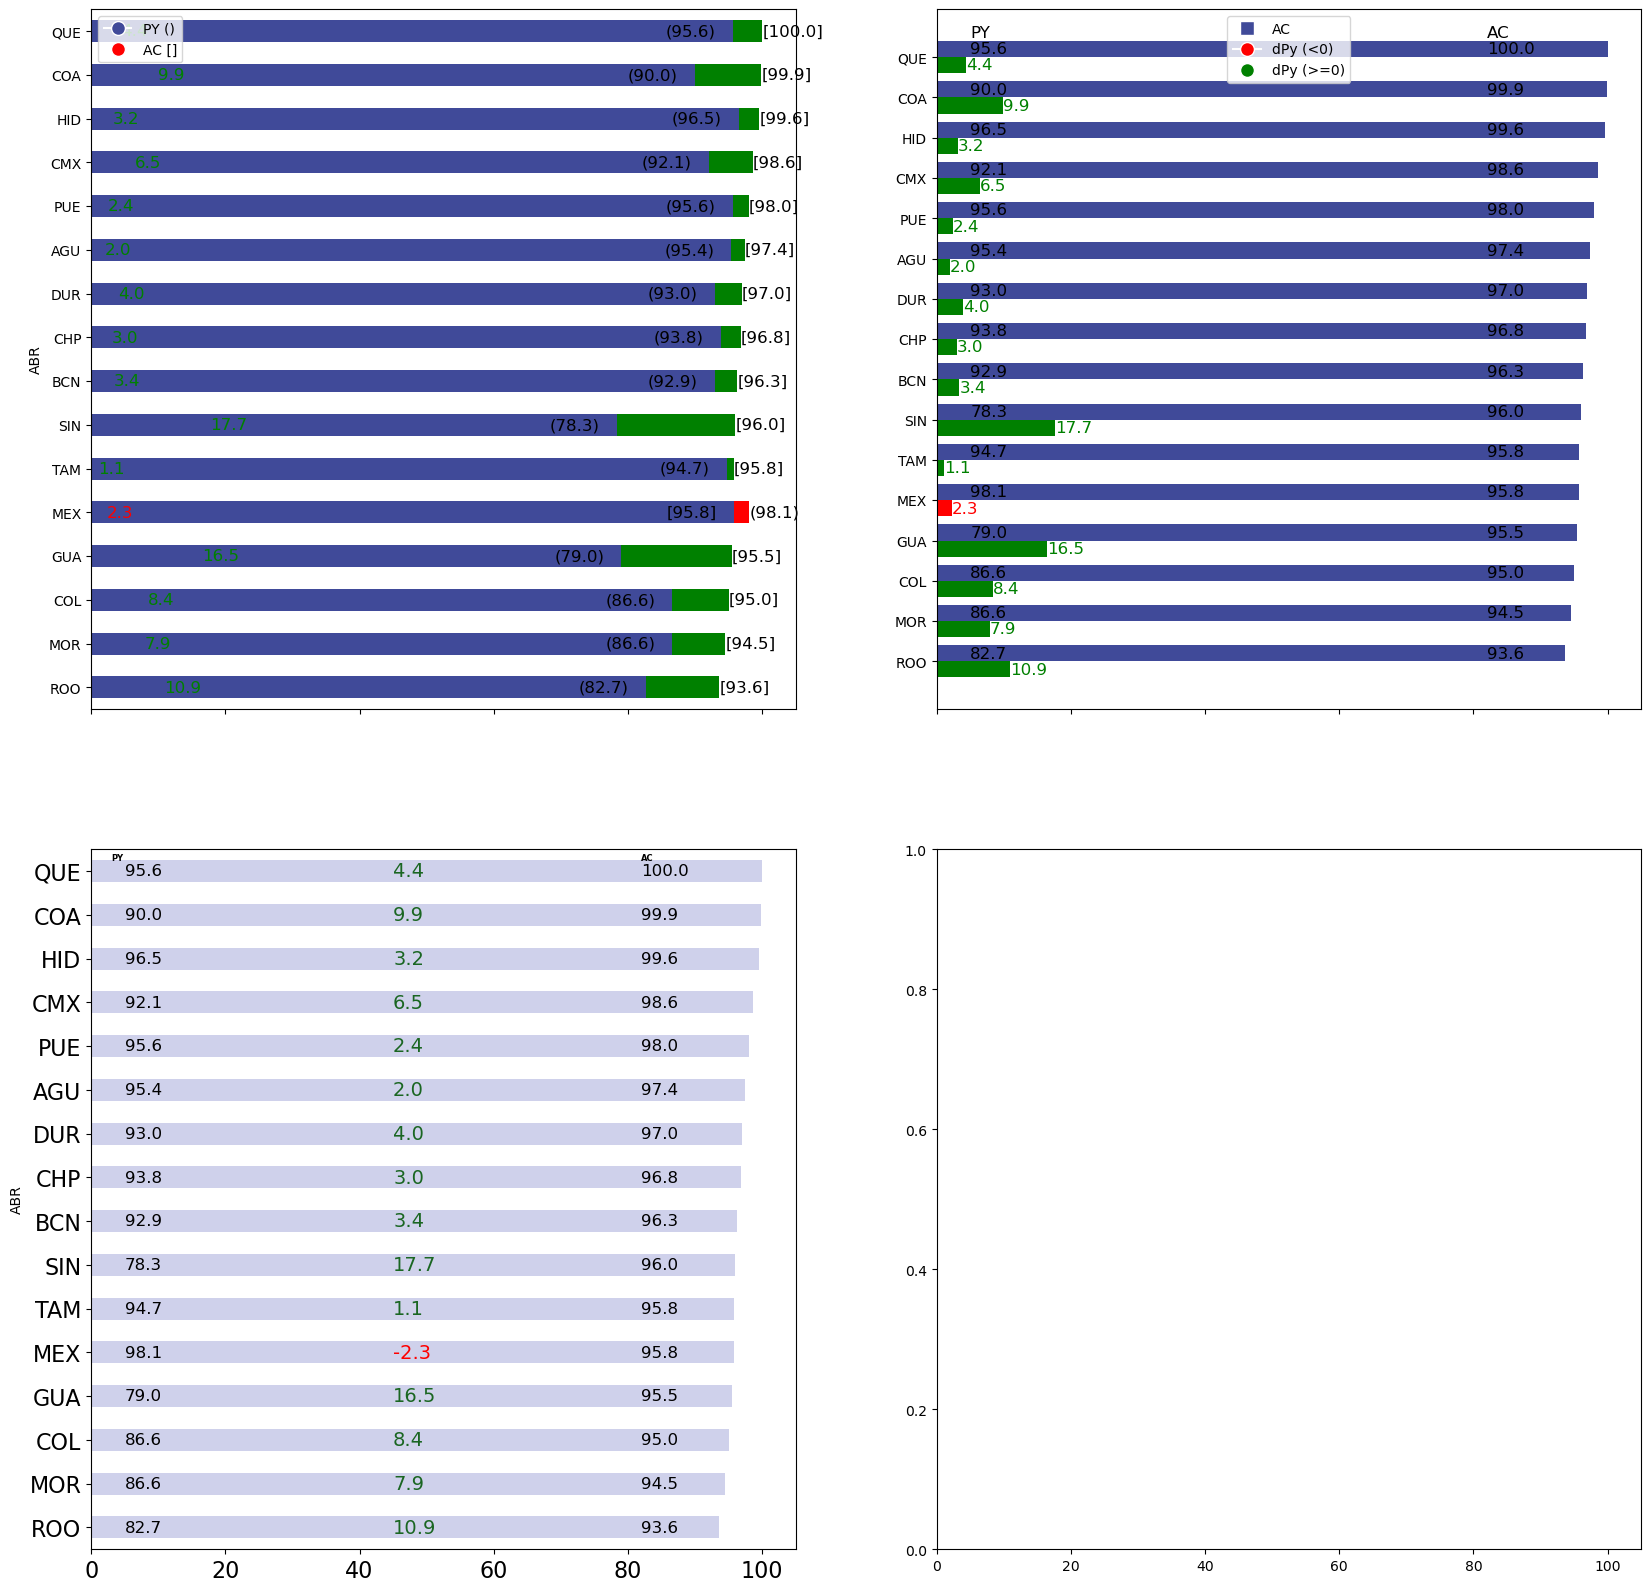

In [21]:
### REVISTA
color_1 = "#CFD1EB"
color_2 = "#8993D9"
color_3 = "#8555D1"
color_4 = "#89B4FF"
color_5 = "#545DE0"
color_6 = "#2C3369"



def text_block(content, pos, ax):
    ax.annotate(text = content,
                    xy=pos, 
                    fontsize=12,
                    horizontalalignment='left', 
                    verticalalignment='center')
    return pos 


prueba, ax = plt.subplots(ncols = 2, nrows = 2, sharex=True, figsize = (20,20))
tabla_pos1['A'].plot(kind = 'barh', ax = ax[0,0], color = tabla_pos1['color'])
tabla_neg1['A'].plot(kind = 'barh', ax = ax[0,0], color = color_vp)

ind = np.arange(len(tabla_vp.index))
altura = 0.4  # la altura de las barras

ax[0, 1].barh(ind, tabla_vp2['dAbs'], color=['green' if v >= 0 else 'red' for v in tabla_vp2['dPY']], height=altura, label='dAbs')
ax[0, 1].barh(ind + altura, tabla_vp2['AC'], color=color_vp, height=altura, label='AC')

# Agregar etiquetas y leyenda
ax[0, 1].set_yticks(ind + altura / 2)
ax[0, 1].set_yticklabels(tabla_vp2.index)
ax[0, 1].legend()
legend_serie1 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_vp, markersize=10, label='PY ()')
legend_rojo = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='AC []')
# legend_azul = plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='black', markersize=10, label='PY')
ax[0,0].legend(handles=[legend_serie1, legend_rojo], loc='upper left')

# Leyenda para ambas series
legend_serie1 = plt.Line2D([0], [0], marker='s', color='w', markerfacecolor = color_vp, markersize=10, label='AC')
legend_rojo = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='dPy (<0)')
legend_azul = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='dPy (>=0)')
# legend_azul = plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='black', markersize=10, label='PY')
ax[0,1].legend(handles=[legend_serie1, legend_rojo, legend_azul], loc='upper center')

pos_check = [f'[{tabla_pos1.loc[estado,"A"]}]' if tabla_pos1.loc[estado, 'clase'] == 'AC' else f'({tabla_pos1.loc[estado,"A"]})' for estado in tabla_pos1.index]
neg_check = [f'[{tabla_neg1.loc[estado,"A"]}]' if tabla_neg1.loc[estado, 'clase'] == 'AC' else f'({tabla_neg1.loc[estado,"A"]})' for estado in tabla_neg1.index]
for k, estado in enumerate(tabla_vp2.index):
    ax[0, 0].annotate(text = pos_check[k],
                        xy=(tabla_pos1.loc[estado,"A"], k), 
                        fontsize=12,
                        horizontalalignment='left', 
                        verticalalignment='center')
    ax[0, 0].annotate(neg_check[k],
                        xy=(tabla_neg1.loc[estado,"A"] - 10, k), 
                        fontsize=12,
                        horizontalalignment='left', 
                        verticalalignment='center')
    ax[0, 0].annotate(text = f'{round(tabla_vp2.loc[estado,"dAbs"], 1)}',
                        xy=(tabla_vp2.loc[estado,'dAbs'], ind[k]), 
                        fontsize=12,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        color = tabla_vp2.iloc[k,-1])


for k, estado in enumerate(tabla_vp2.index):
    text_block(f'{tabla_vp2.loc[estado,"AC"]}',(82, ind[k] + altura), ax[0,1])
    text_block(f'{tabla_vp2.loc[estado,"PY"]}',(5, ind[k] + altura), ax[0,1])
    ax[0, 1].annotate(text = f'{round(tabla_vp2.loc[estado,"dAbs"], 1)}',
                        xy=(tabla_vp2.loc[estado,'dAbs'], ind[k]), 
                        fontsize=12,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        color = tabla_vp2.iloc[k,-1])
ax[0, 1].annotate(text = 'PY',
                        xy=(5, ind[k] + 2 * altura), 
                        fontsize=12,
                        horizontalalignment='left', 
                        verticalalignment='center')
ax[0, 1].annotate(text = 'AC',
                        xy=(82, ind[k] + 2 * altura), 
                        fontsize=12,
                        horizontalalignment='left', 
                        verticalalignment='center')

def text_block(content, pos, ax):
    ax.annotate(text = content,
                    xy=pos, 
                    fontsize=12,
                    horizontalalignment='left', 
                    verticalalignment='center', color = 'white')
    return pos 



tabla_vp2['AC'].plot(kind='barh', color = color_1, fontsize=16, ax = ax[1,0])
ax[1, 0].annotate(text = 'PY',
                        xy=(3, 15.3), 
                        fontsize=6,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')
ax[1, 0].annotate(text = 'AC',
                        xy=(82, 15.3), 
                        fontsize=6,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')
color_t = ['#1A6622' if v >= 0 else 'red' for v in tabla_vp2['dPY']]
text_t = [round(va, 1) for va in tabla_vp2['dPY']]
for k, estado in enumerate(tabla_vp2.index):
    ax[1, 0].annotate(text = tabla_vp2.loc[estado, 'PY'],
                        xy=(5, k), 
                        fontsize=12,
                        horizontalalignment='left', 
                        verticalalignment='center')
    ax[1, 0].annotate(text = text_t[k],
                        xy=(45, k), 
                        fontsize=14,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        color = color_t[k])
    ax[1, 0].annotate(text = tabla_vp2.loc[estado, 'AC'],
                        xy=(82, k), 
                        fontsize=12,
                        horizontalalignment='left', 
                        verticalalignment='center')


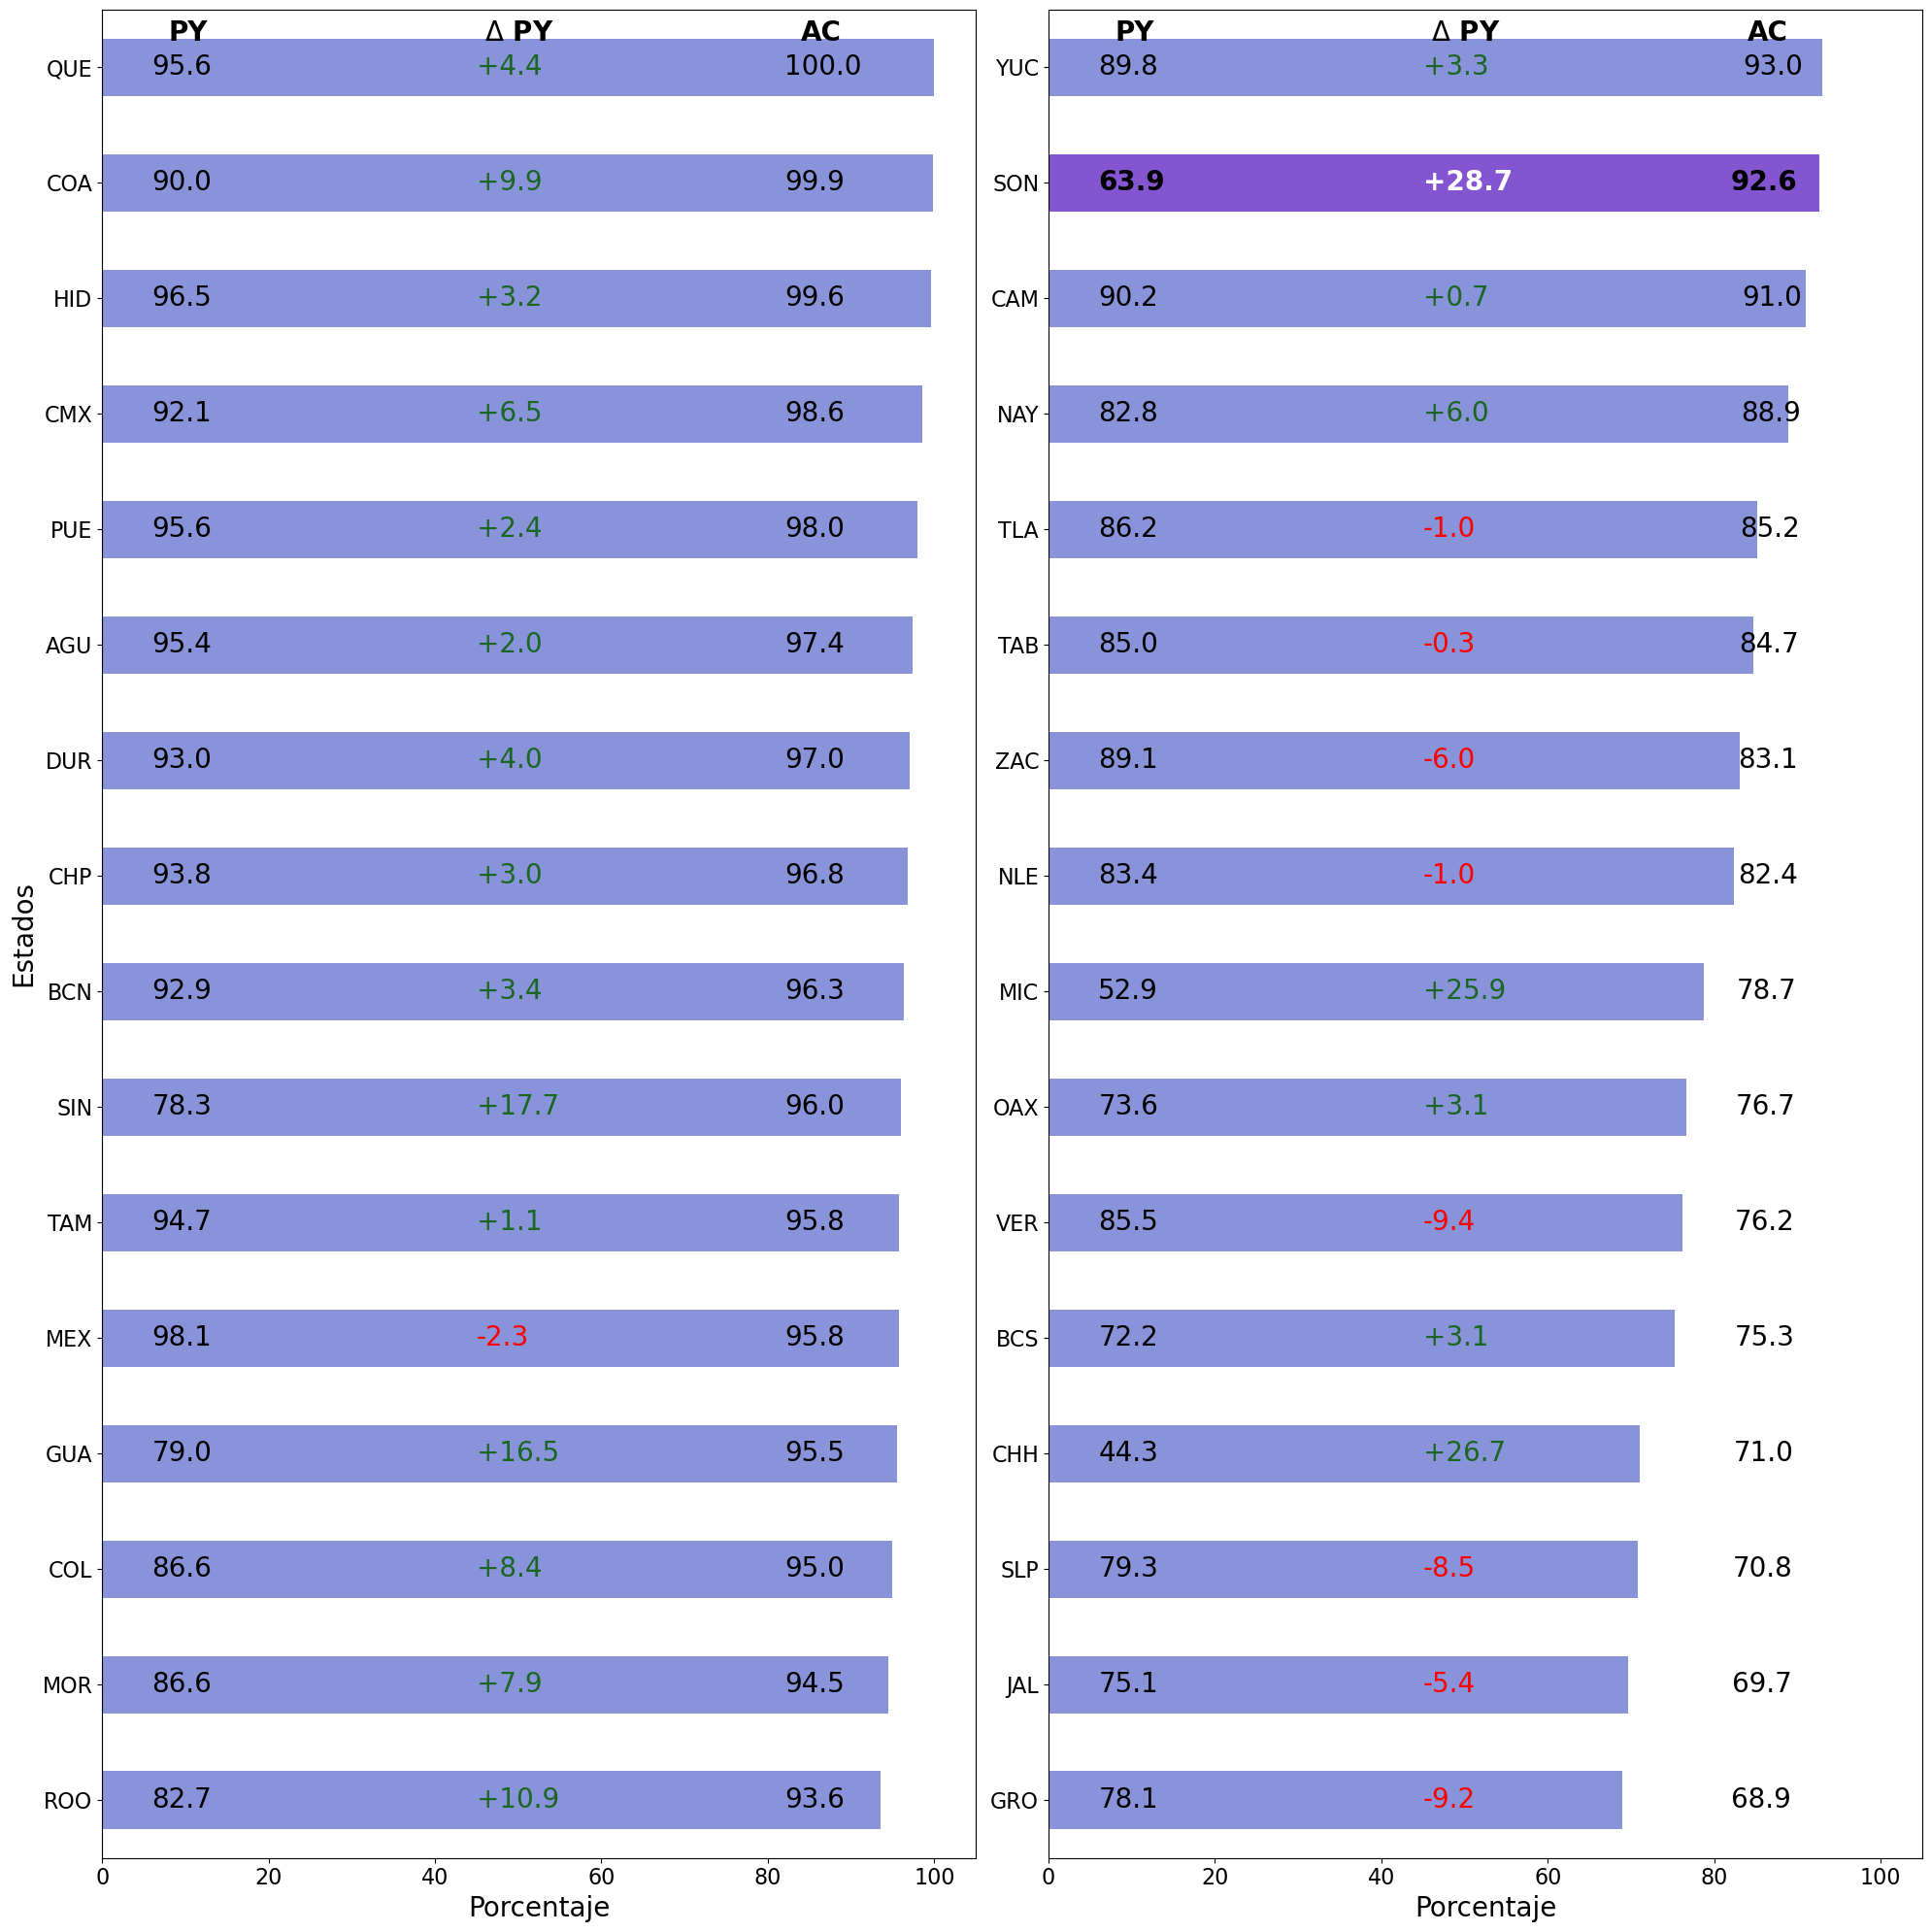

In [22]:
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize = (20,20), sharex=True)




tabla_vp2['AC'].plot(kind='barh', color = color_2, fontsize=16, ax = ax[0])
ax[0].annotate(text = 'PY',
                        xy=(8, 15.3), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')
ax[0].annotate(text = r'$\Delta$ PY',
                        xy=(46, 15.3), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')
ax[0].annotate(text = 'AC',
                        xy=(84, 15.3), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')


color_t = ['#1A6622' if v >= 0 else 'red' for v in tabla_vp2['dPY']]
text_t = [f'+{round(va, 1)}' if round(va, 1)>= 0 else round(va, 1) for va in tabla_vp2['dPY']]
for k, estado in enumerate(tabla_vp2.index):
    ax[0].annotate(text = tabla_vp2.loc[estado, 'PY'],
                        xy=(6, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center')
    ax[0].annotate(text = text_t[k],
                        xy=(45, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        color = color_t[k])
    ax[0].annotate(text = tabla_vp2.loc[estado, 'AC'],
                        xy=(82, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center')
tabla_vp['AC'].plot(kind='barh', color = [color_2 for i in range(14)] + [color_3, color_2], fontsize=16, ax = ax[1])


ax[1].annotate(text = 'PY',
                        xy=(8, 15.3), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')
ax[1].annotate(text = r'$\Delta$ PY',
                        xy=(46, 15.3), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')
ax[1].annotate(text = 'AC',
                        xy=(84, 15.3), 
                        fontsize= 20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')


color_t = ['#1A6622' if v >= 0 else 'red' for v in tabla_vp['dPY']]
text_t = [f'+{round(va, 1)}' if round(va, 1)>= 0 else round(va, 1) for va in tabla_vp['dPY']]
for k, estado in enumerate(tabla_vp.index):
    if estado == 'SON':
        ax[1].annotate(text = tabla_vp.loc[estado, 'PY'],
                            xy=(6, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center', weight = 'bold')
        ax[1].annotate(text = text_t[k],
                            xy=(45, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            color = 'white', weight = 'bold')
        ax[1].annotate(text = tabla_vp.loc[estado, 'AC'],
                            xy=(82, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center', weight = 'bold')
    else:
        ax[1].annotate(text = tabla_vp.loc[estado, 'PY'],
                            xy=(6, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center')
        ax[1].annotate(text = text_t[k],
                            xy=(45, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            color = color_t[k])
        ax[1].annotate(text = tabla_vp.loc[estado, 'AC'],
                            xy=(82 + k/10, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center')
        
ax[0].set_xlabel('Porcentaje', fontsize = 20)
ax[0].set_ylabel('Estados', fontsize = 20)
ax[1].set_ylabel('', fontsize = 20)
ax[1].set_xlabel('Porcentaje', fontsize = 20)
plt.tight_layout()

# Graficas Articulo P2

In [23]:
file_vp = pd.read_excel('plot_data\\tablavp.xlsx',sheet_name=None)
sheets = list(file_vp.keys())

tabla_vp = file_vp['Contenido Contable']

tabla_vp.set_index('Estado',drop=True, inplace=True)
tabla_vp['dAbs'] = tabla_vp['dPY'].abs()
tabla_vp['color'] = ['green' if u >= 0 else 'red' for u in tabla_vp['dPY']]
tabla_vp.sort_values('AC', ascending=True, inplace=True)
tabla_s = tabla_vp.copy()

abreviaturas = pd.read_excel('plot_data\\Abreviaturas.xlsx')

abreviaturas['NEW'] = [s[3:] for s in abreviaturas['Abreviatura']]

abreviaturas['Estado'] = abreviaturas['Estado'].str.replace('Estado de ', '')
abreviaturas.iloc[4,0] = 'Coahuila'
abreviaturas.iloc[23,0] = 'San Luís Potosí'
abreviaturas.iloc[21,0] = 'Queretaro'
abreviaturas.iloc[8,0] = 'Cuidad de México'

f = [list(abreviaturas['Estado']).index(u) for u in tabla_s.index]

tabla_s['ABR'] = [list(abreviaturas['NEW'])[q] for q in f]

tabla_s.set_index('ABR',drop=True, inplace=True)
tabla_s



tabla_vp = tabla_s.iloc[:16,]
tabla_vp2 = tabla_s.iloc[16:,]



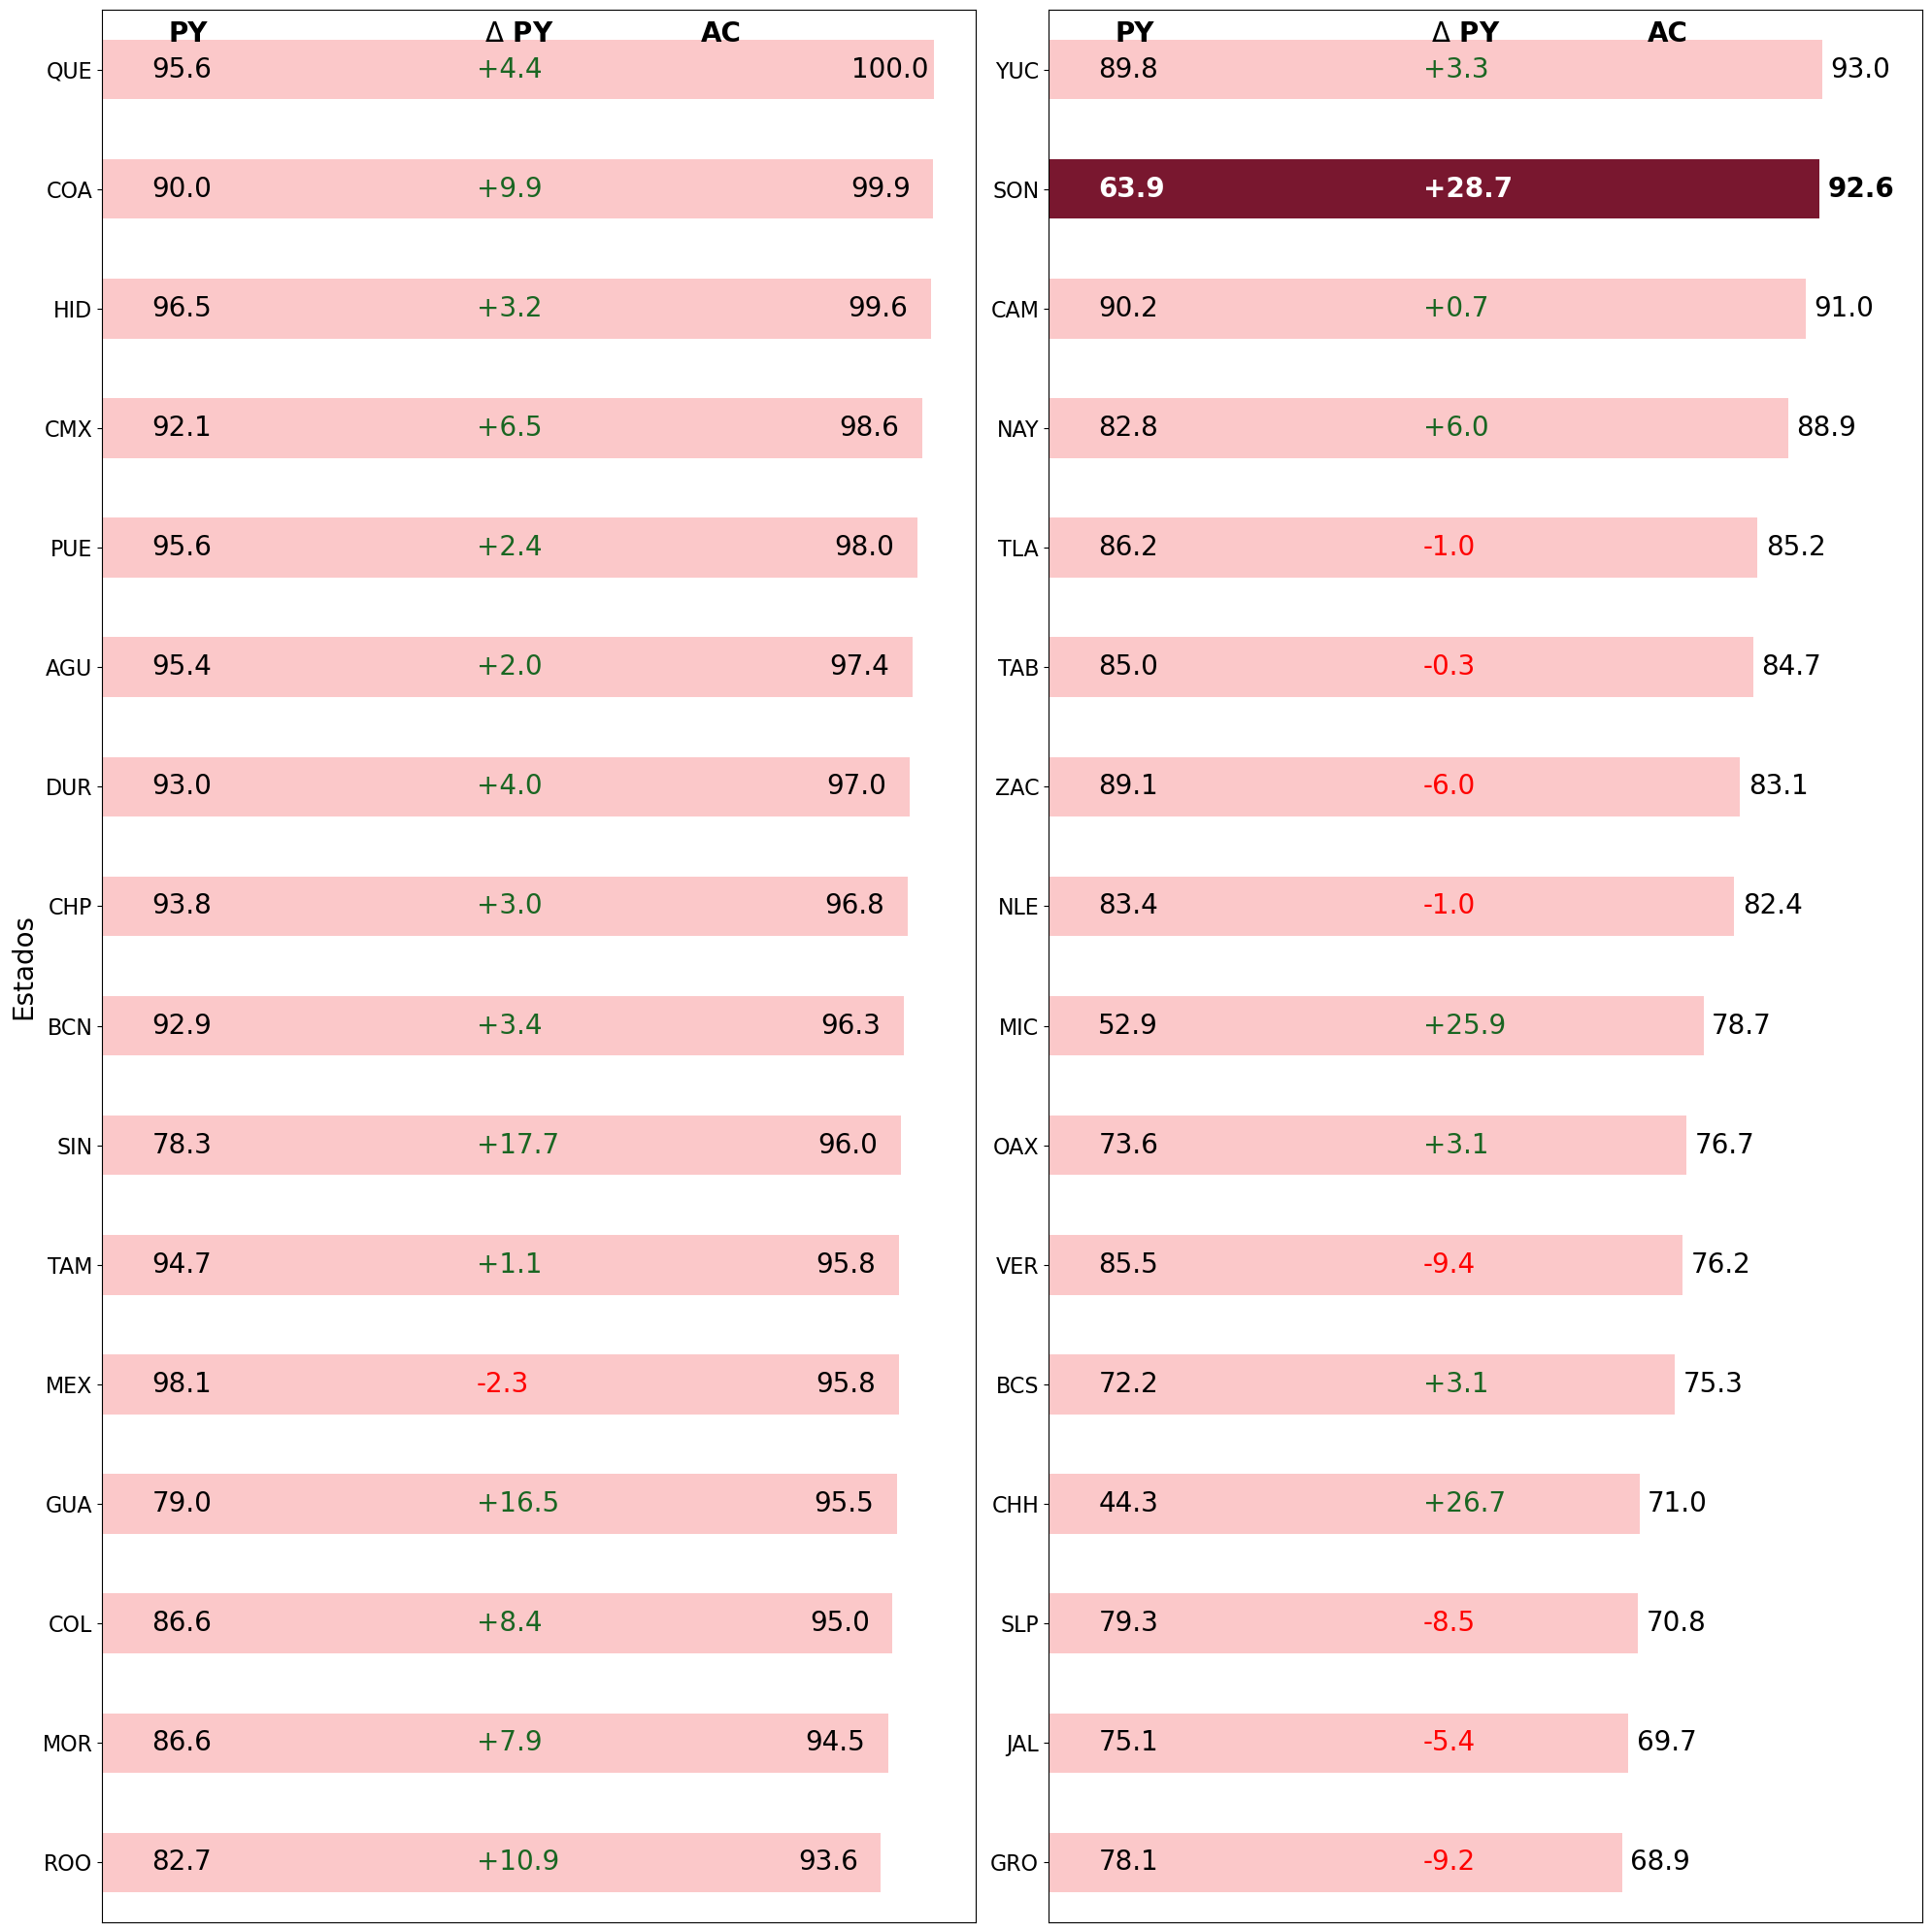

In [24]:
def py_d_ac(ax):
    ax.annotate(text = 'PY',
                            xy=(8, 15.3), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            weight = 'bold')
    ax.annotate(text = r'$\Delta$ PY',
                            xy=(46, 15.3), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            weight = 'bold')
    ax.annotate(text = 'AC',
                            xy=(72, 15.3), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            weight = 'bold')


fig, ax = plt.subplots(nrows=1, ncols= 2, figsize = (20,20), sharex=True)
tabla_vp2['AC'].plot(kind='barh', color = "#FBC8C9", fontsize=16, ax = ax[0])
py_d_ac(ax[0])

color_t = ['#1A6622' if v >= 0 else 'red' for v in tabla_vp2['dPY']]
text_t = [f'+{round(va, 1)}' if round(va, 1)>= 0 else round(va, 1) for va in tabla_vp2['dPY']]
for k, estado in enumerate(tabla_vp2.index):
    ax[0].annotate(text = tabla_vp2.loc[estado, 'PY'],
                        xy=(6, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center')
    ax[0].annotate(text = text_t[k],
                        xy=(45, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        color = color_t[k])
    ax[0].annotate(text = tabla_vp2.loc[estado, 'AC'],
                        xy=(tabla_vp2.loc[estado, 'AC'] - 10, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center')
    


tabla_vp['AC'].plot(kind='barh', color = ["#FBC8C9" for i in range(14)] + ["#79172F", "#FBC8C9"], fontsize=16, ax = ax[1])
py_d_ac(ax[1])


color_t = ['#1A6622' if v >= 0 else 'red' for v in tabla_vp['dPY']]
text_t = [f'+{round(va, 1)}' if round(va, 1)>= 0 else round(va, 1) for va in tabla_vp['dPY']]
for k, estado in enumerate(tabla_vp.index):
    if estado == 'SON':
        ax[1].annotate(text = tabla_vp.loc[estado, 'PY'],
                            xy=(6, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center', color = 'white', weight = 'bold')
        ax[1].annotate(text = text_t[k],
                            xy=(45, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            color = 'white', weight = 'bold')
        ax[1].annotate(text = tabla_vp.loc[estado, 'AC'],
                            xy=(tabla_vp.loc[estado, 'AC'] + 1, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center', weight = 'bold')
    else:
        ax[1].annotate(text = tabla_vp.loc[estado, 'PY'],
                            xy=(6, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center')
        ax[1].annotate(text = text_t[k],
                            xy=(45, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            color = color_t[k])
        ax[1].annotate(text = tabla_vp.loc[estado, 'AC'],
                            xy=(tabla_vp.loc[estado, 'AC'] + 1, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center')
ax[0].axes.get_xaxis().set_visible(False)
ax[1].axes.get_xaxis().set_visible(False)
ax[0].set_xlabel('Porcentaje', fontsize = 20)
ax[0].set_ylabel('Estados', fontsize = 20)
ax[1].set_ylabel('', fontsize = 20)
ax[1].set_xlabel('Porcentaje', fontsize = 20)
plt.tight_layout()

In [25]:
tabla_vp = file_vp['Contenido Presupuestal']

tabla_vp.set_index('Estado',drop=True, inplace=True)
tabla_vp['dAbs'] = tabla_vp['dPY'].abs()
tabla_vp['color'] = ['green' if u >= 0 else 'red' for u in tabla_vp['dPY']]
tabla_vp.sort_values('AC', ascending=True, inplace=True)
tabla_s = tabla_vp.copy()

In [26]:
abreviaturas = pd.read_excel('plot_data\\Abreviaturas.xlsx')

abreviaturas['NEW'] = [s[3:] for s in abreviaturas['Abreviatura']]

abreviaturas['Estado'] = abreviaturas['Estado'].str.replace('Estado de ', '')
abreviaturas.iloc[4,0] = 'Coahuila'
abreviaturas.iloc[23,0] = 'San Luis Potosi'
abreviaturas.iloc[21,0] = 'Queretaro'

f = [list(abreviaturas['Estado']).index(u) for u in tabla_s.index]

tabla_s['ABR'] = [list(abreviaturas['NEW'])[q] for q in f]

tabla_s.set_index('ABR',drop=True, inplace=True)
tabla_s



tabla_vp = tabla_s.iloc[:16,]
tabla_vp2 = tabla_s.iloc[16:,]

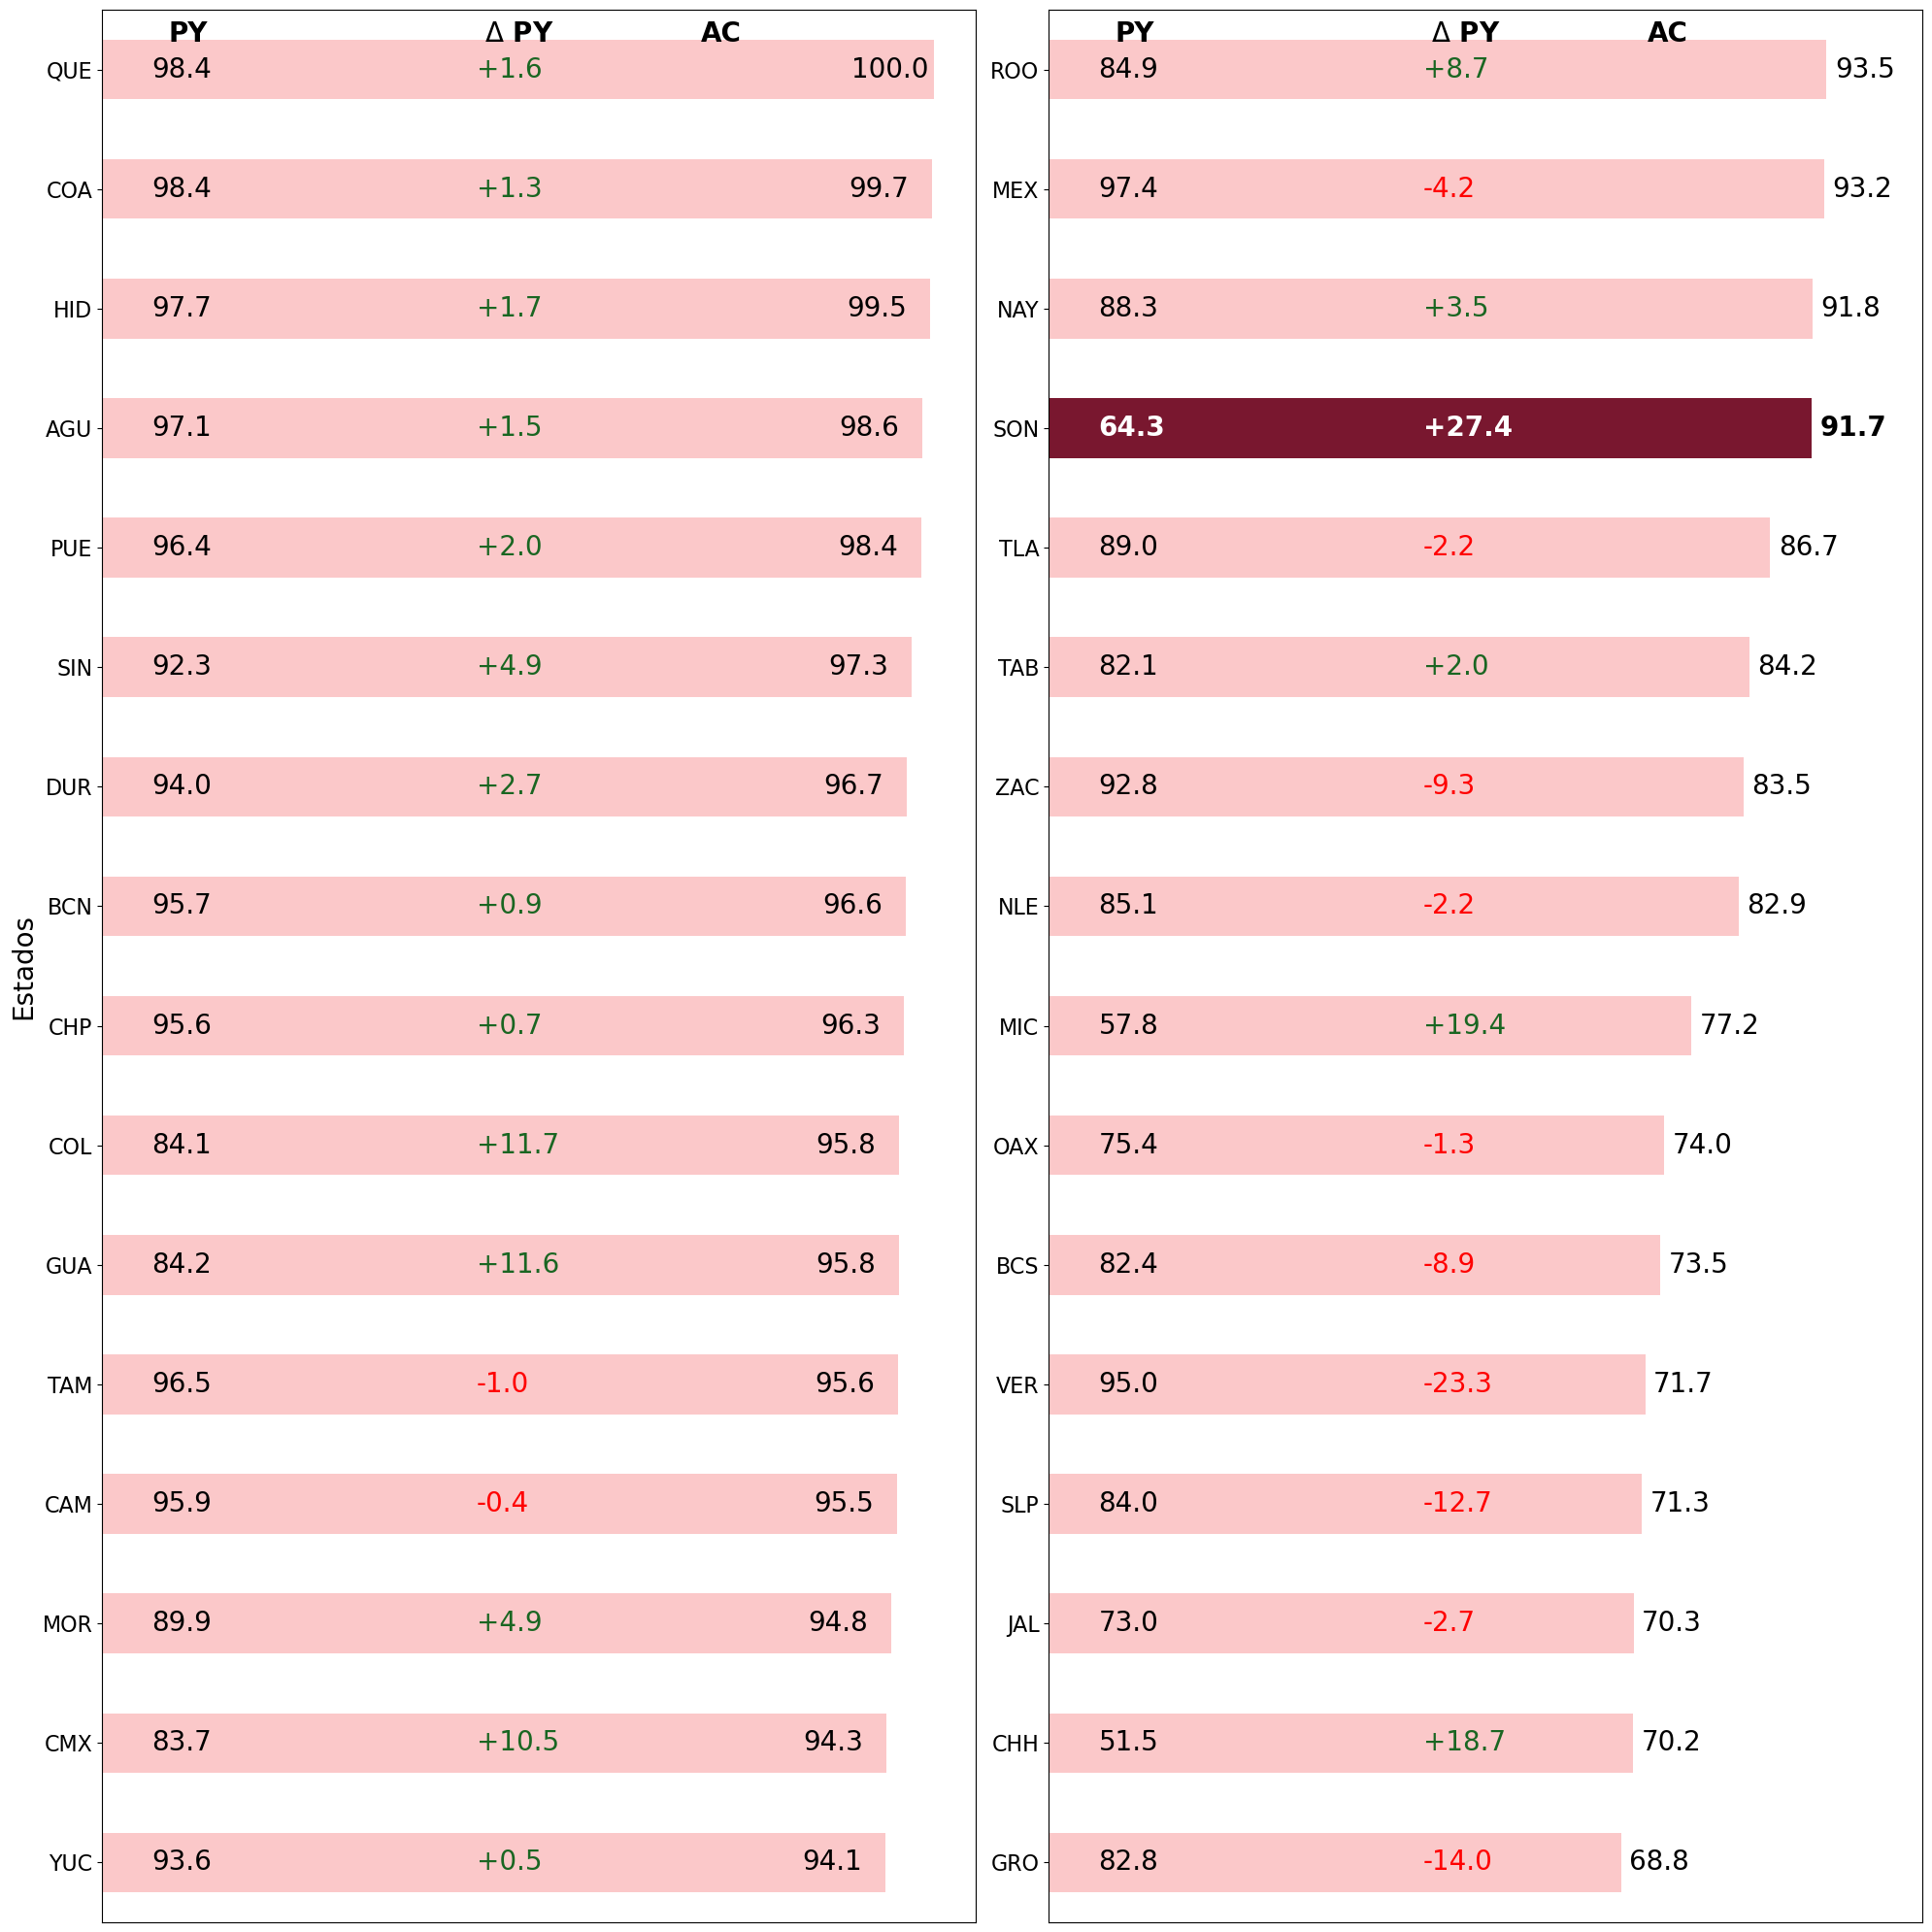

In [27]:
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize = (20,20), sharex=True)

tabla_vp2['AC'].plot(kind='barh', color = "#FBC8C9", fontsize=16, ax = ax[0])
py_d_ac(ax[0])
color_t = ['#1A6622' if v >= 0 else 'red' for v in tabla_vp2['dPY']]
text_t = [f'+{round(va, 1)}' if round(va, 1)>= 0 else round(va, 1) for va in tabla_vp2['dPY']]
for k, estado in enumerate(tabla_vp2.index):
    ax[0].annotate(text = tabla_vp2.loc[estado, 'PY'],
                        xy=(6, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center')
    ax[0].annotate(text = text_t[k],
                        xy=(45, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        color = color_t[k])
    ax[0].annotate(text = tabla_vp2.loc[estado, 'AC'],
                        xy=(tabla_vp2.loc[estado, 'AC'] - 10, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center')
    


tabla_vp['AC'].plot(kind='barh', color = ["#FBC8C9" for i in range(12)] + ["#79172F", "#FBC8C9", "#FBC8C9", "#FBC8C9"], fontsize=16, ax = ax[1])
py_d_ac(ax[1])




color_t = ['#1A6622' if v >= 0 else 'red' for v in tabla_vp['dPY']]
text_t = [f'+{round(va, 1)}' if round(va, 1)>= 0 else round(va, 1) for va in tabla_vp['dPY']]
for k, estado in enumerate(tabla_vp.index):
    if estado == 'SON':
        ax[1].annotate(text = tabla_vp.loc[estado, 'PY'],
                            xy=(6, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center', color = 'white', weight = 'bold')
        ax[1].annotate(text = text_t[k],
                            xy=(45, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            color = 'white', weight = 'bold')
        ax[1].annotate(text = tabla_vp.loc[estado, 'AC'],
                            xy=(tabla_vp.loc[estado, 'AC'] + 1, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center', weight = 'bold')
    else:
        ax[1].annotate(text = tabla_vp.loc[estado, 'PY'],
                            xy=(6, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center')
        ax[1].annotate(text = text_t[k],
                            xy=(45, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            color = color_t[k])
        ax[1].annotate(text = tabla_vp.loc[estado, 'AC'],
                            xy=(tabla_vp.loc[estado, 'AC'] + 1, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center')
ax[0].axes.get_xaxis().set_visible(False)
ax[1].axes.get_xaxis().set_visible(False)
ax[0].set_xlabel('Porcentaje', fontsize = 20)
ax[0].set_ylabel('Estados', fontsize = 20)
ax[1].set_ylabel('', fontsize = 20)
ax[1].set_xlabel('Porcentaje', fontsize = 20)
plt.tight_layout()

In [28]:
tabla_vp = file_vp['Contenido Programático']

tabla_vp.set_index('Estado',drop=True, inplace=True)
tabla_vp['dAbs'] = tabla_vp['dPY'].abs()
tabla_vp['color'] = ['green' if u >= 0 else 'red' for u in tabla_vp['dPY']]
tabla_vp.sort_values('AC', ascending=True, inplace=True)
tabla_s = tabla_vp.copy()

In [29]:
abreviaturas = pd.read_excel('plot_data\\Abreviaturas.xlsx')

abreviaturas['NEW'] = [s[3:] for s in abreviaturas['Abreviatura']]

abreviaturas['Estado'] = abreviaturas['Estado'].str.replace('Estado de ', '')
abreviaturas.iloc[4,0] = 'Coahuila'
abreviaturas.iloc[23,0] = 'San Luís Potosí'
abreviaturas.iloc[21,0] = 'Queretaro'

f = [list(abreviaturas['Estado']).index(u) for u in tabla_s.index]

tabla_s['ABR'] = [list(abreviaturas['NEW'])[q] for q in f]

tabla_s.set_index('ABR',drop=True, inplace=True)
tabla_s



tabla_vp = tabla_s.iloc[:16,]
tabla_vp2 = tabla_s.iloc[16:,]

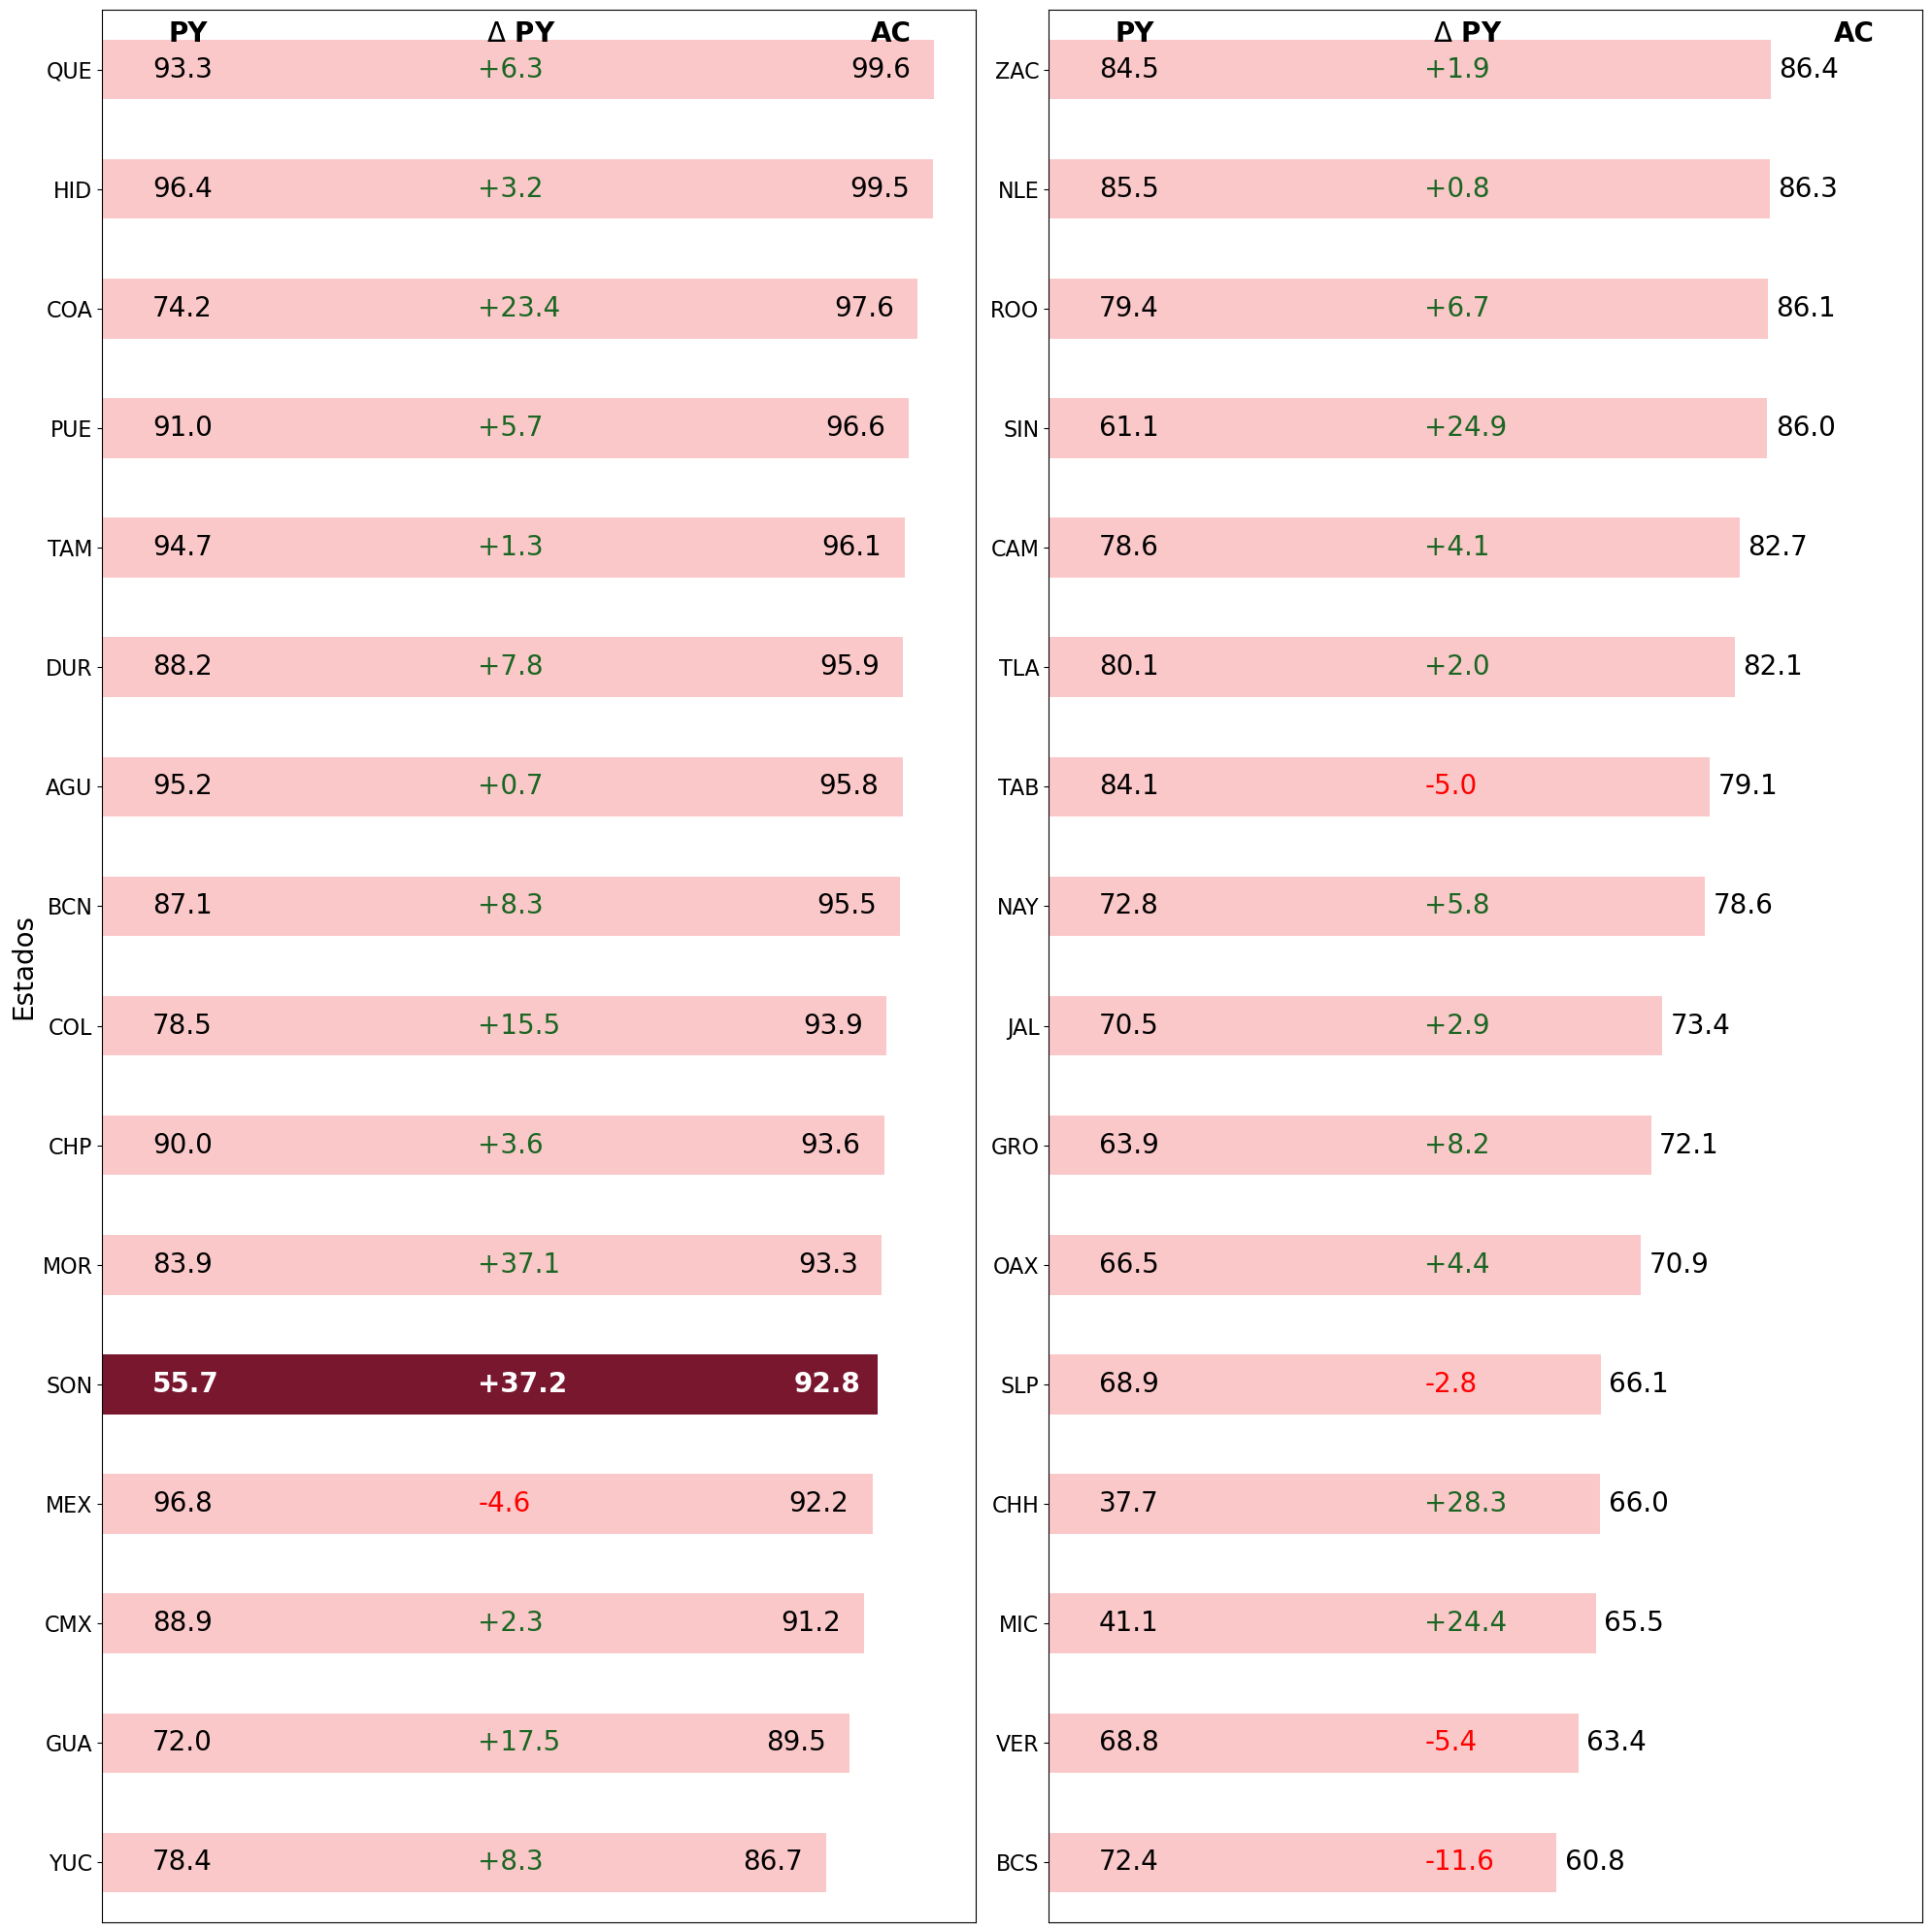

In [30]:
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize = (20,20), sharex=True)




tabla_vp2['AC'].plot(kind='barh', color = ["#FBC8C9" for i in range(4)] + ["#79172F"] + ["#FBC8C9" for i in range(11)], fontsize=16, ax = ax[0])
ax[0].annotate(text = 'PY',
                        xy=(8, 15.3), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')
ax[0].annotate(text = r'$\Delta$ PY',
                        xy=(46, 15.3), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')
ax[0].annotate(text = 'AC',
                        xy=(84+8, 15.3), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')
color_t = ['#1A6622' if v >= 0 else 'red' for v in tabla_vp2['dPY']]
text_t = [f'+{round(va, 1)}' if round(va, 1)>= 0 else round(va, 1) for va in tabla_vp2['dPY']]
for k, estado in enumerate(tabla_vp2.index):
    if estado == 'SON':
        ax[0].annotate(text = tabla_vp2.loc[estado, 'PY'],
                            xy=(6, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center', color = 'white', weight = 'bold')
        ax[0].annotate(text = text_t[k],
                            xy=(45, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            color = 'white', weight = 'bold')
        ax[0].annotate(text = tabla_vp2.loc[estado, 'AC'],
                            xy=(tabla_vp2.loc[estado, 'AC'] - 10, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center', weight = 'bold', color = 'white')
    else:
        ax[0].annotate(text = tabla_vp2.loc[estado, 'PY'],
                            xy=(6, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center')
        ax[0].annotate(text = text_t[k],
                            xy=(45, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            color = color_t[k])
        ax[0].annotate(text = tabla_vp2.loc[estado, 'AC'],
                            xy=(tabla_vp2.loc[estado, 'AC'] - 10, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center')


tabla_vp['AC'].plot(kind='barh', color = "#FBC8C9", fontsize=16, ax = ax[1])

ax[1].annotate(text = 'PY',
                        xy=(8, 15.3), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')
ax[1].annotate(text = r'$\Delta$ PY',
                        xy=(46, 15.3), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')
ax[1].annotate(text = 'AC',
                        xy=(84 + 10, 15.3), 
                        fontsize= 20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')




color_t = ['#1A6622' if v >= 0 else 'red' for v in tabla_vp['dPY']]
text_t = [f'+{round(va, 1)}' if round(va, 1)>= 0 else round(va, 1) for va in tabla_vp['dPY']]
for k, estado in enumerate(tabla_vp.index):
    ax[1].annotate(text = tabla_vp.loc[estado, 'PY'],
                        xy=(6, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center')
    ax[1].annotate(text = text_t[k],
                        xy=(45, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        color = color_t[k])
    ax[1].annotate(text = tabla_vp.loc[estado, 'AC'],
                        xy=(tabla_vp.loc[estado, 'AC'] + 1, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center')        
        
ax[0].axes.get_xaxis().set_visible(False)
ax[1].axes.get_xaxis().set_visible(False)
ax[0].set_xlabel('Porcentaje', fontsize = 20)
ax[0].set_ylabel('Estados', fontsize = 20)
ax[1].set_ylabel('', fontsize = 20)
ax[1].set_xlabel('Porcentaje', fontsize = 20)
plt.tight_layout()

In [31]:
tabla_vp = file_vp['Transparencia']

tabla_vp.set_index('Estado',drop=True, inplace=True)
tabla_vp['dAbs'] = tabla_vp['dPY'].abs()
tabla_vp['color'] = ['green' if u >= 0 else 'red' for u in tabla_vp['dPY']]
tabla_vp.sort_values('AC', ascending=True, inplace=True)
tabla_s = tabla_vp.copy()

In [32]:
abreviaturas = pd.read_excel('plot_data\\Abreviaturas.xlsx')

abreviaturas['NEW'] = [s[3:] for s in abreviaturas['Abreviatura']]

abreviaturas['Estado'] = abreviaturas['Estado'].str.replace('Estado de ', '')
abreviaturas.iloc[4,0] = 'Coahuila'
abreviaturas.iloc[23,0] = 'San Luís Potosí'
abreviaturas.iloc[21,0] = 'Querétaro'

f = [list(abreviaturas['Estado']).index(u) for u in tabla_s.index]

tabla_s['ABR'] = [list(abreviaturas['NEW'])[q] for q in f]

tabla_s.set_index('ABR',drop=True, inplace=True)
tabla_s



tabla_vp = tabla_s.iloc[:16,]
tabla_vp2 = tabla_s.iloc[16:,]

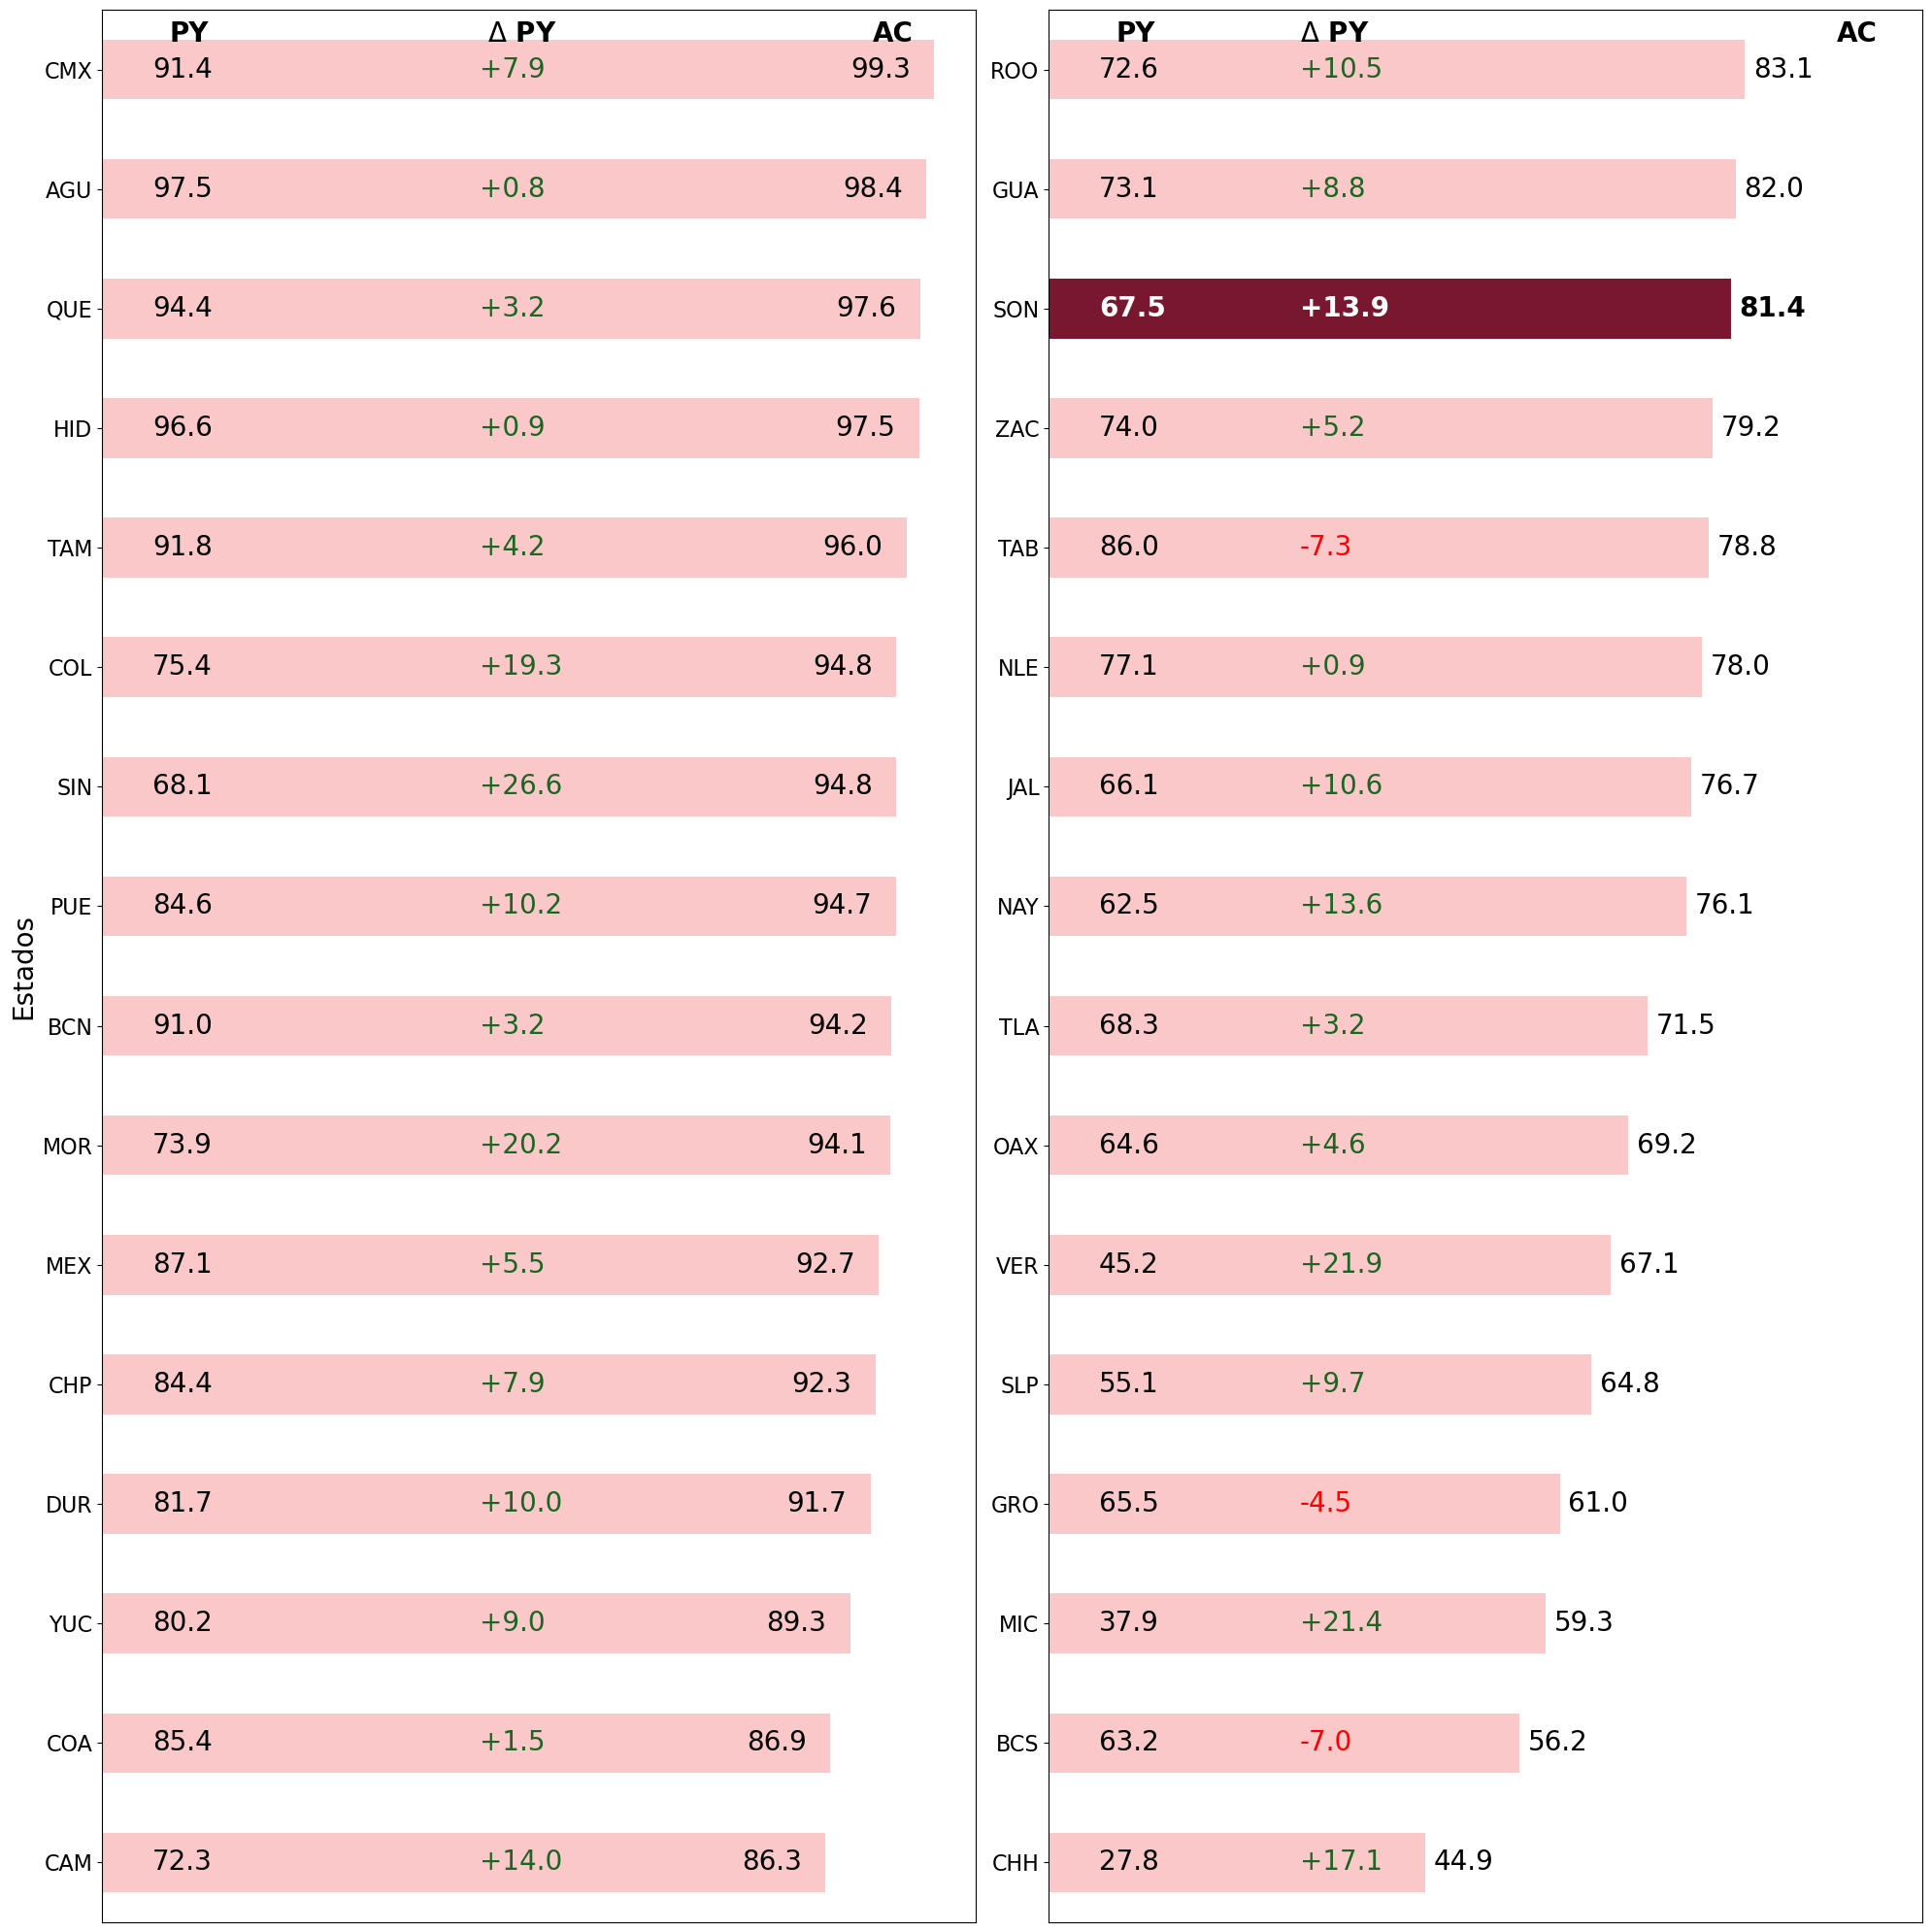

In [33]:
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize = (20,20), sharex=True)




tabla_vp2['AC'].plot(kind='barh', color = "#FBC8C9", fontsize=16, ax = ax[0])
ax[0].annotate(text = 'PY',
                        xy=(8, 15.3), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')
ax[0].annotate(text = r'$\Delta$ PY',
                        xy=(46, 15.3), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')
ax[0].annotate(text = 'AC',
                        xy=(84+8, 15.3), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')
color_t = ['#1A6622' if v >= 0 else 'red' for v in tabla_vp2['dPY']]
text_t = [f'+{round(va, 1)}' if round(va, 1)>= 0 else round(va, 1) for va in tabla_vp2['dPY']]
for k, estado in enumerate(tabla_vp2.index):
    ax[0].annotate(text = tabla_vp2.loc[estado, 'PY'],
                        xy=(6, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center')
    ax[0].annotate(text = text_t[k],
                        xy=(45, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        color = color_t[k])
    ax[0].annotate(text = tabla_vp2.loc[estado, 'AC'],
                        xy=(tabla_vp2.loc[estado, 'AC'] - 10, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center')
    


tabla_vp['AC'].plot(kind='barh', color = ["#FBC8C9" for i in range(13)] + ["#79172F", "#FBC8C9", "#FBC8C9"], fontsize=16, ax = ax[1])

ax[1].annotate(text = 'PY',
                        xy=(8, 15.3), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')
ax[1].annotate(text = r'$\Delta$ PY',
                        xy=(30, 15.3), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')
ax[1].annotate(text = 'AC',
                        xy=(84 + 10, 15.3), 
                        fontsize= 20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')




color_t = ['#1A6622' if v >= 0 else 'red' for v in tabla_vp['dPY']]
text_t = [f'+{round(va, 1)}' if round(va, 1)>= 0 else round(va, 1) for va in tabla_vp['dPY']]
for k, estado in enumerate(tabla_vp.index):
    if estado == 'SON':
        ax[1].annotate(text = tabla_vp.loc[estado, 'PY'],
                            xy=(6, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center', color = 'white', weight = 'bold')
        ax[1].annotate(text = text_t[k],
                            xy=(30, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            color = 'white', weight = 'bold')
        ax[1].annotate(text = tabla_vp.loc[estado, 'AC'],
                            xy=(tabla_vp.loc[estado, 'AC'] + 1, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center', weight = 'bold')
    else:
        ax[1].annotate(text = tabla_vp.loc[estado, 'PY'],
                            xy=(6, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center')
        ax[1].annotate(text = text_t[k],
                            xy=(40 - 10, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            color = color_t[k])
        ax[1].annotate(text = tabla_vp.loc[estado, 'AC'],
                            xy=(tabla_vp.loc[estado, 'AC'] + 1, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center')
ax[0].axes.get_xaxis().set_visible(False)
ax[1].axes.get_xaxis().set_visible(False)
ax[0].set_xlabel('Porcentaje', fontsize = 20)
ax[0].set_ylabel('Estados', fontsize = 20)
ax[1].set_ylabel('', fontsize = 20)
ax[1].set_xlabel('Porcentaje', fontsize = 20)
plt.tight_layout()

In [34]:
dfs = pd.read_excel('plot_data\\gc.xlsx')
dfp = dfs.iloc[2:-1,1:]
dfp.columns = ['Categorias','Monto','Procentaje']

import plotly.express as px
fig = px.treemap(dfp, 
                 path=[px.Constant(f"{dfs.iloc[-1, 1]} {dfs.iloc[-1, 2]}"),'Categorias'],
                 values='Monto')
fig.update_traces(root_color="lightgrey", pathbar_textfont = {'size': 70})
fig.update_traces(marker_colors = ['red','green','blue','brown','black','red','red','red','red','pink'])
fig.update_layout(height = 1920, width = 1920, margin = dict(t=50, l=25, r=25, b=25))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.data[0].customdata = np.column_stack([dfp['Monto'], 100 * dfp['Procentaje']])
fig.data[0].texttemplate = "%{label}<br>Monto:$ %{customdata[0]}<br>Porcentaje: %{customdata[1]:.2f}%"
#fig.data[0].texttemplate = "%{label}<br>%{value}<br>Monto:$ %{customdata[0]}<br>Porcentaje: %{customdata[1]:.2f}%"
fig.show()

FileNotFoundError: [Errno 2] No such file or directory: 'plot_data\\gc.xlsx'

In [ ]:
dfp

,Categorias,Monto,Procentaje
2,Agua Potable,1848045.0,0.107625
3,Alcantarillado,944629.0,0.055013
4,Drenajes y Letrinas,1700032.0,0.099005
5,Electrificación,985663.0,0.057402
6,Infraestructura Sector Educativo,12528.0,0.000730
7,Infraestructura Sector Salud,50481.0,0.002940
8,Mejoramiento de Vivienda,10883441.0,0.633822
9,Urbanización,668287.0,0.038919
10,Otros gastos,78037.0,0.004545


In [ ]:
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

values = [0, 11, 12, 13, 14, 15, 20, 30]
labels = ["container", "A1", "A2", "A3", "A4", "A5", "B1", "B2"]
parents = ["", "container", "A1", "A2", "A3", "A4", "container", "B1"]

fig = go.Figure(go.Treemap(
    labels = dfp['Categorias'],
    values = dfp['Monto'],
    parents = ["","","","","","","","","","",],
    marker_colorscale = 'Blues')
)

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

fig.show()



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

d = {'count': [1,1,1,2,2,3,3,3,4], 
     'name': ['bob','bob','bob','shelby','shelby','jordan','jordan','jordan','jeff'],
     'type': ['type1','type2','type4','type1','type6','type5','type8','type2',None],
     'salary':[1000,2000,3000,10000,15000,30000,100000,50000,25000]}
df = pd.DataFrame(data=d)

# group data and aggregate
df_plot = df.groupby(['name','type'])[['salary','count']].sum().reset_index()
df_plot.sort_values(by=['name','type'],inplace=True)

avg_salary = df_plot['salary'].sum()/df_plot['count'].sum()

# plot treemap
fig = px.treemap(df_plot,
                 values='count',
                 color='salary',
                 color_continuous_scale='balance',
                 color_continuous_midpoint=avg_salary,
                 path=['type','name'])
# fig.data[0].textinfo = 'label+value+percent parent'
percents = (100*df.salary / sum(df.salary)).tolist()
salaries = df.salary.tolist()

## store multiple lists of data in customdata
fig.data[0].customdata = np.column_stack([dfp['Monto'], dfp['Procentaje']])
fig.data[0].texttemplate = "%{label}<br>%{value}<br>Salary:$%{customdata[0]}<br>Percent of total:%{customdata[1]:.2f}%"
fig.show()

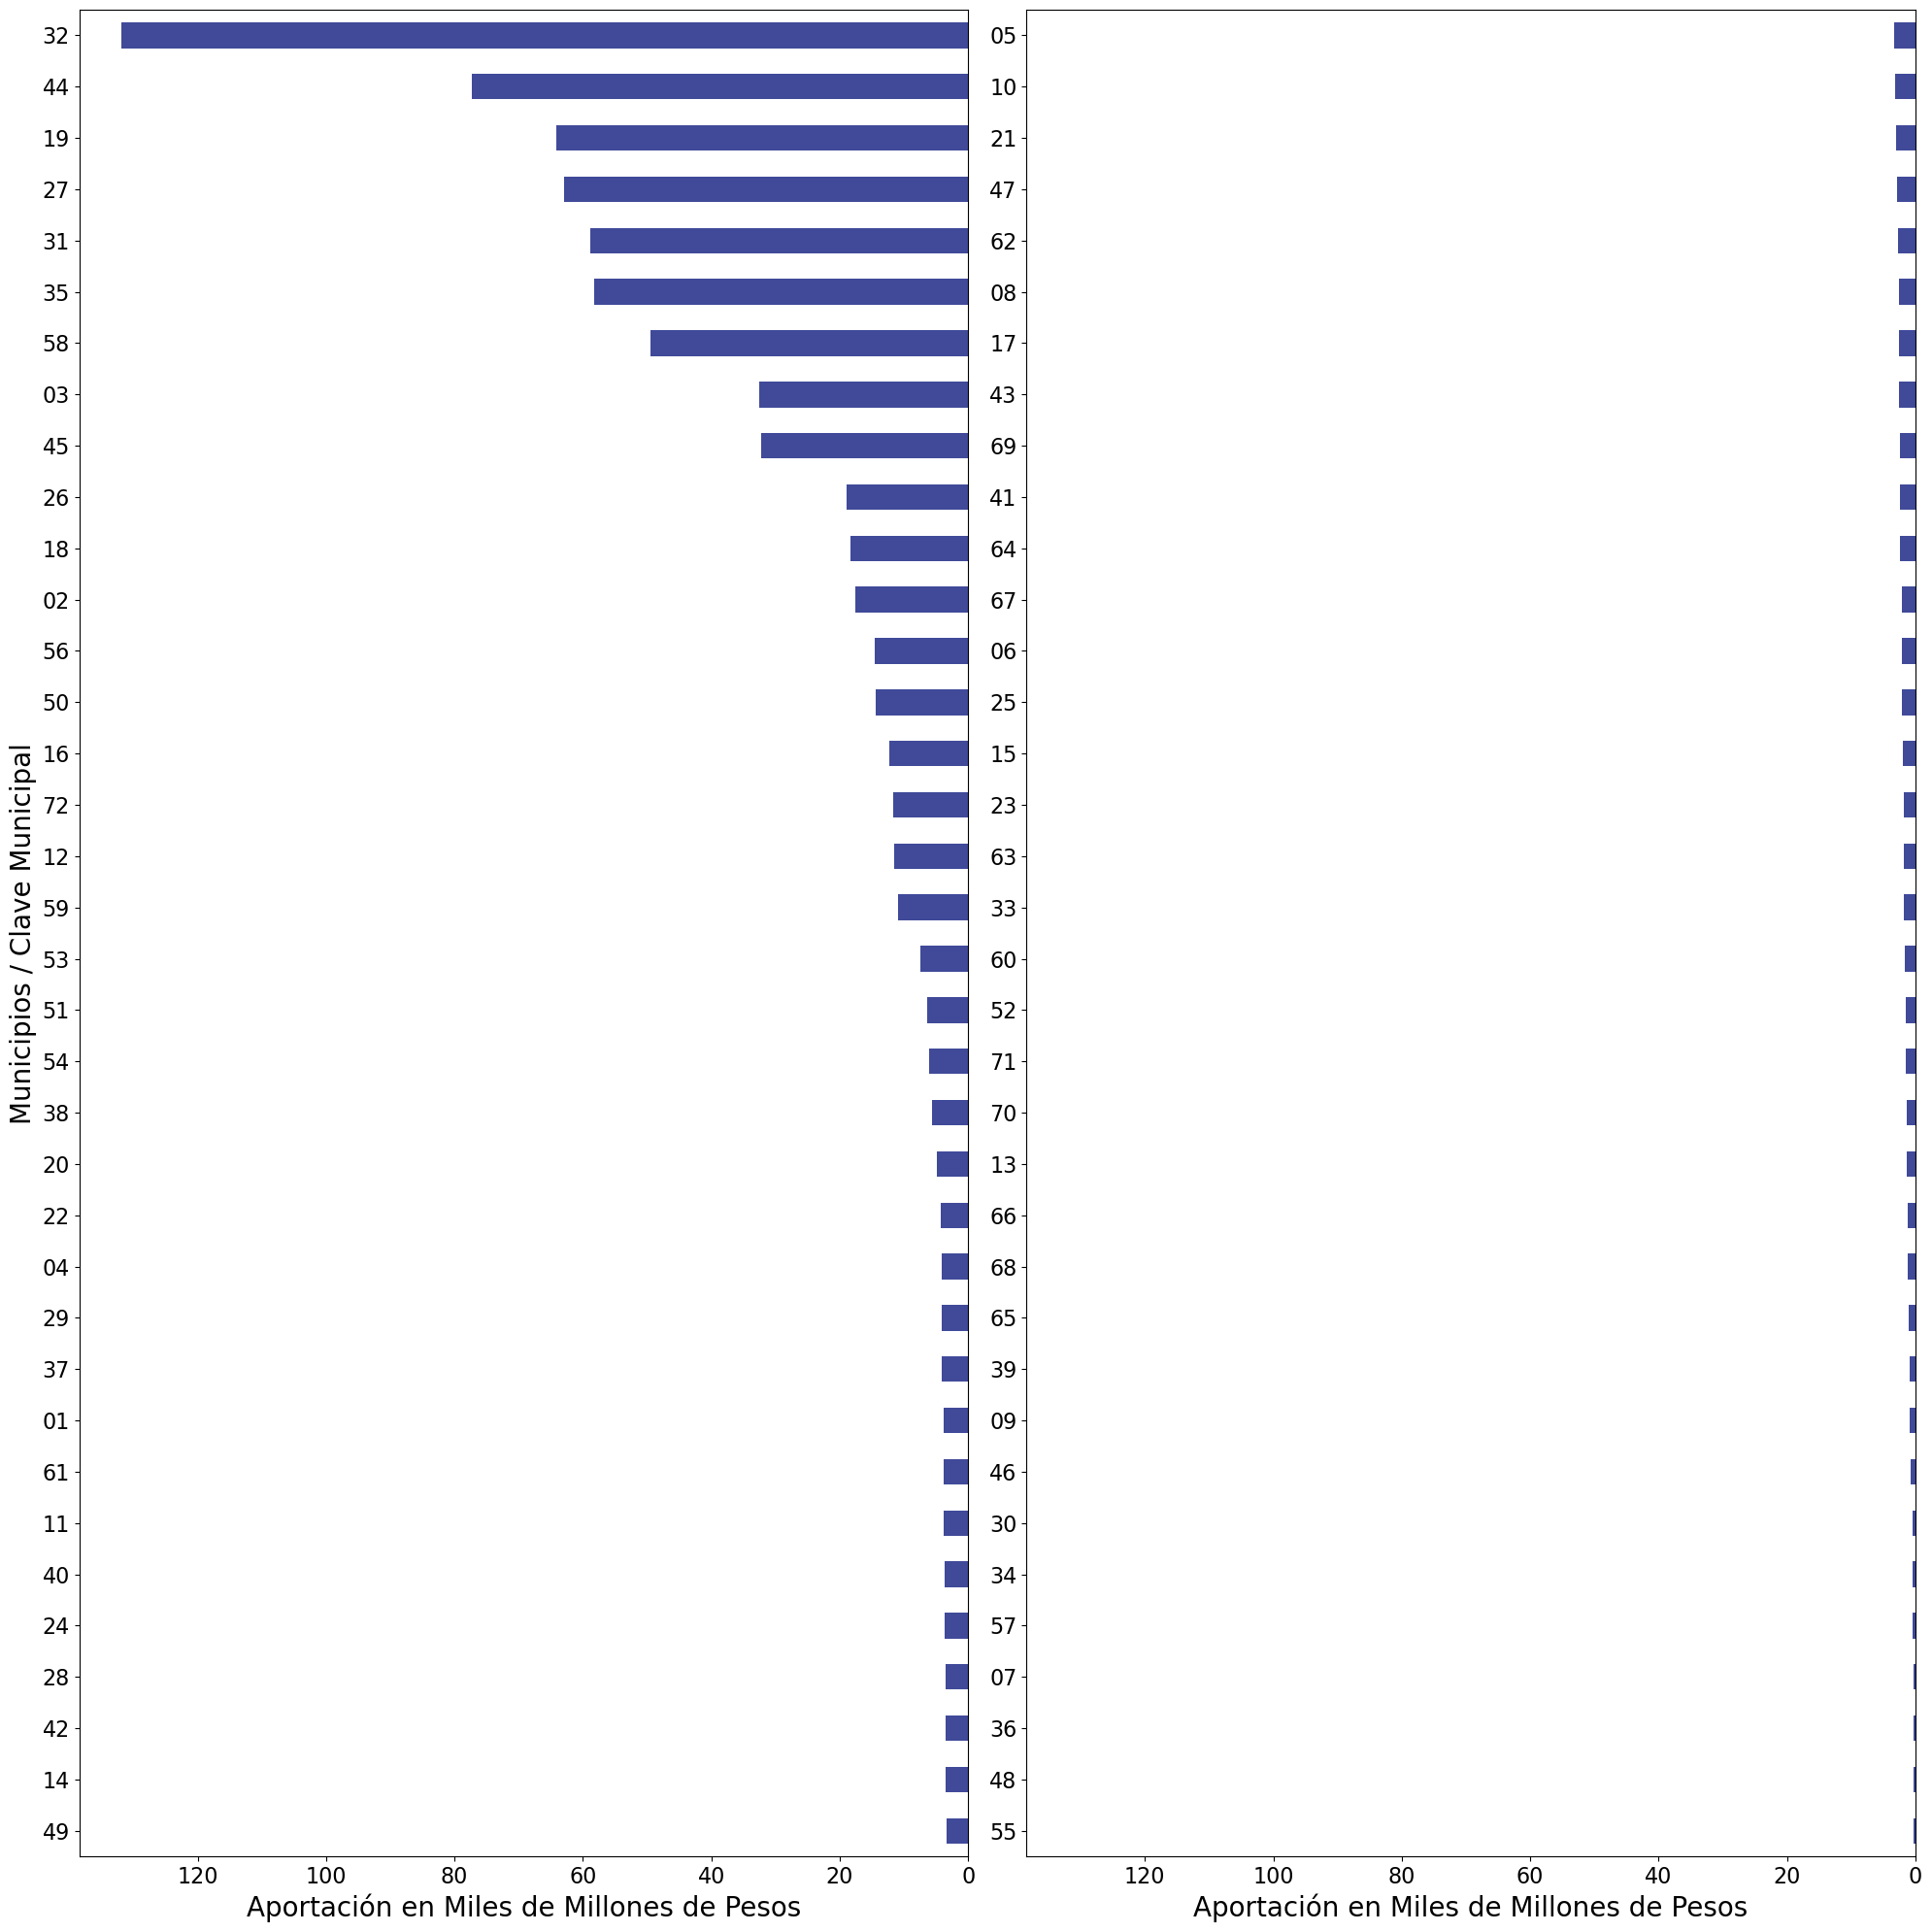

In [ ]:
fis2, ax = plt.subplots(ncols=2, nrows=1, figsize = (20,20),sharex=True)
dfr['ANUAL MDP'].plot(kind='barh',
                      color = color_vp,
                      ax = ax[0],
                      fontsize=16)
ax[0].set_ylabel('Municipios / Clave Municipal', fontsize = 20)
ax[0].set_xlabel('Aportación en Miles de Millones de Pesos', fontsize=20)
ax[0].invert_xaxis()
dfl['ANUAL MDP'].plot(kind='barh',
                      color = color_vp,
                      ax = ax[1],
                      ylabel='',
                      fontsize=16)
ax[1].set_xlabel('Aportación en Miles de Millones de Pesos', fontsize=20)

plt.tight_layout()